# Experiment 3: Quality of the predicted distances in higher dimensions

In this notebook, we perform computations corresponding to Experiment 3, described in the thesis report. Specifically, we consider the models trained during Experiment 1 on the UCI high-dimensional datasets and measure the errors of the distances they predict for the points of both real and synthetic test datasets, comparing these predictions to ground truth values generated with Algorithm 1. Results are shown for every black box - copy - algorithm combination available and summarized through averaged tables and scatter plots that describe the relationship between the real and predicted distances.

As a remark, this particular notebook and its plots correspond to the execution with seed 42. Nevertheless, the computations shown in the tables have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase the reliability and significance of the obtained results.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d
from ucimlrepo import fetch_ucirepo
from scipy.stats import qmc
from sklearn.metrics import mean_absolute_error, mean_squared_error

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

In [3]:
# Import dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features.values
X = normalize(X)
y = np.where(breast_cancer_wisconsin_diagnostic.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 30))

### Black box 1: Random Forest classifier

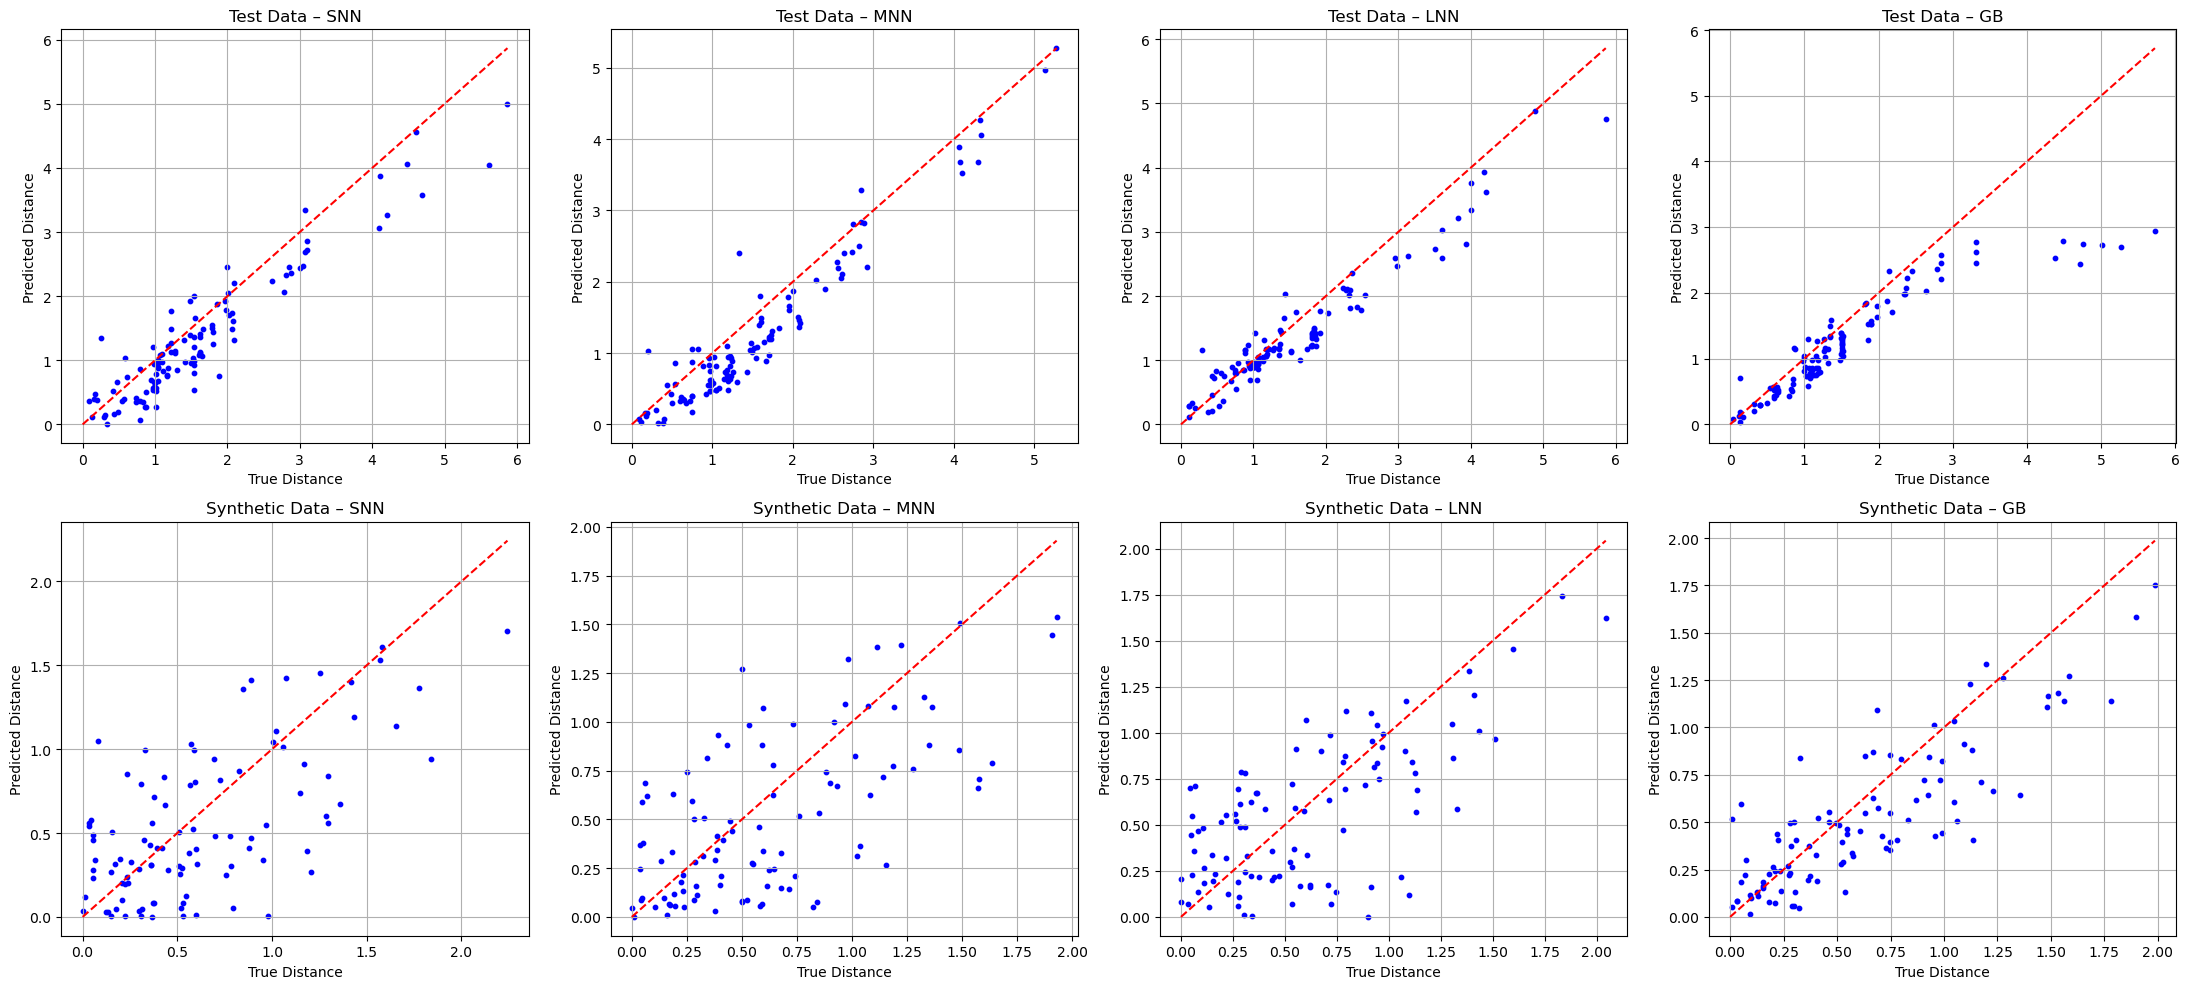


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.342122 0.025804   0.420086  0.033753
     Test Data   MNN  0.409740 0.032544   0.483918  0.044313
     Test Data   LNN  0.385028 0.075310   0.485935  0.094746
     Test Data    GB  0.338901 0.042619   0.619002  0.066453
Synthetic Data   SNN  0.295075 0.022800   0.378549  0.022924
Synthetic Data   MNN  0.308580 0.019090   0.394006  0.026376
Synthetic Data   LNN  0.310131 0.028413   0.387730  0.035713
Synthetic Data    GB  0.224305 0.015046   0.295844  0.020113


In [4]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

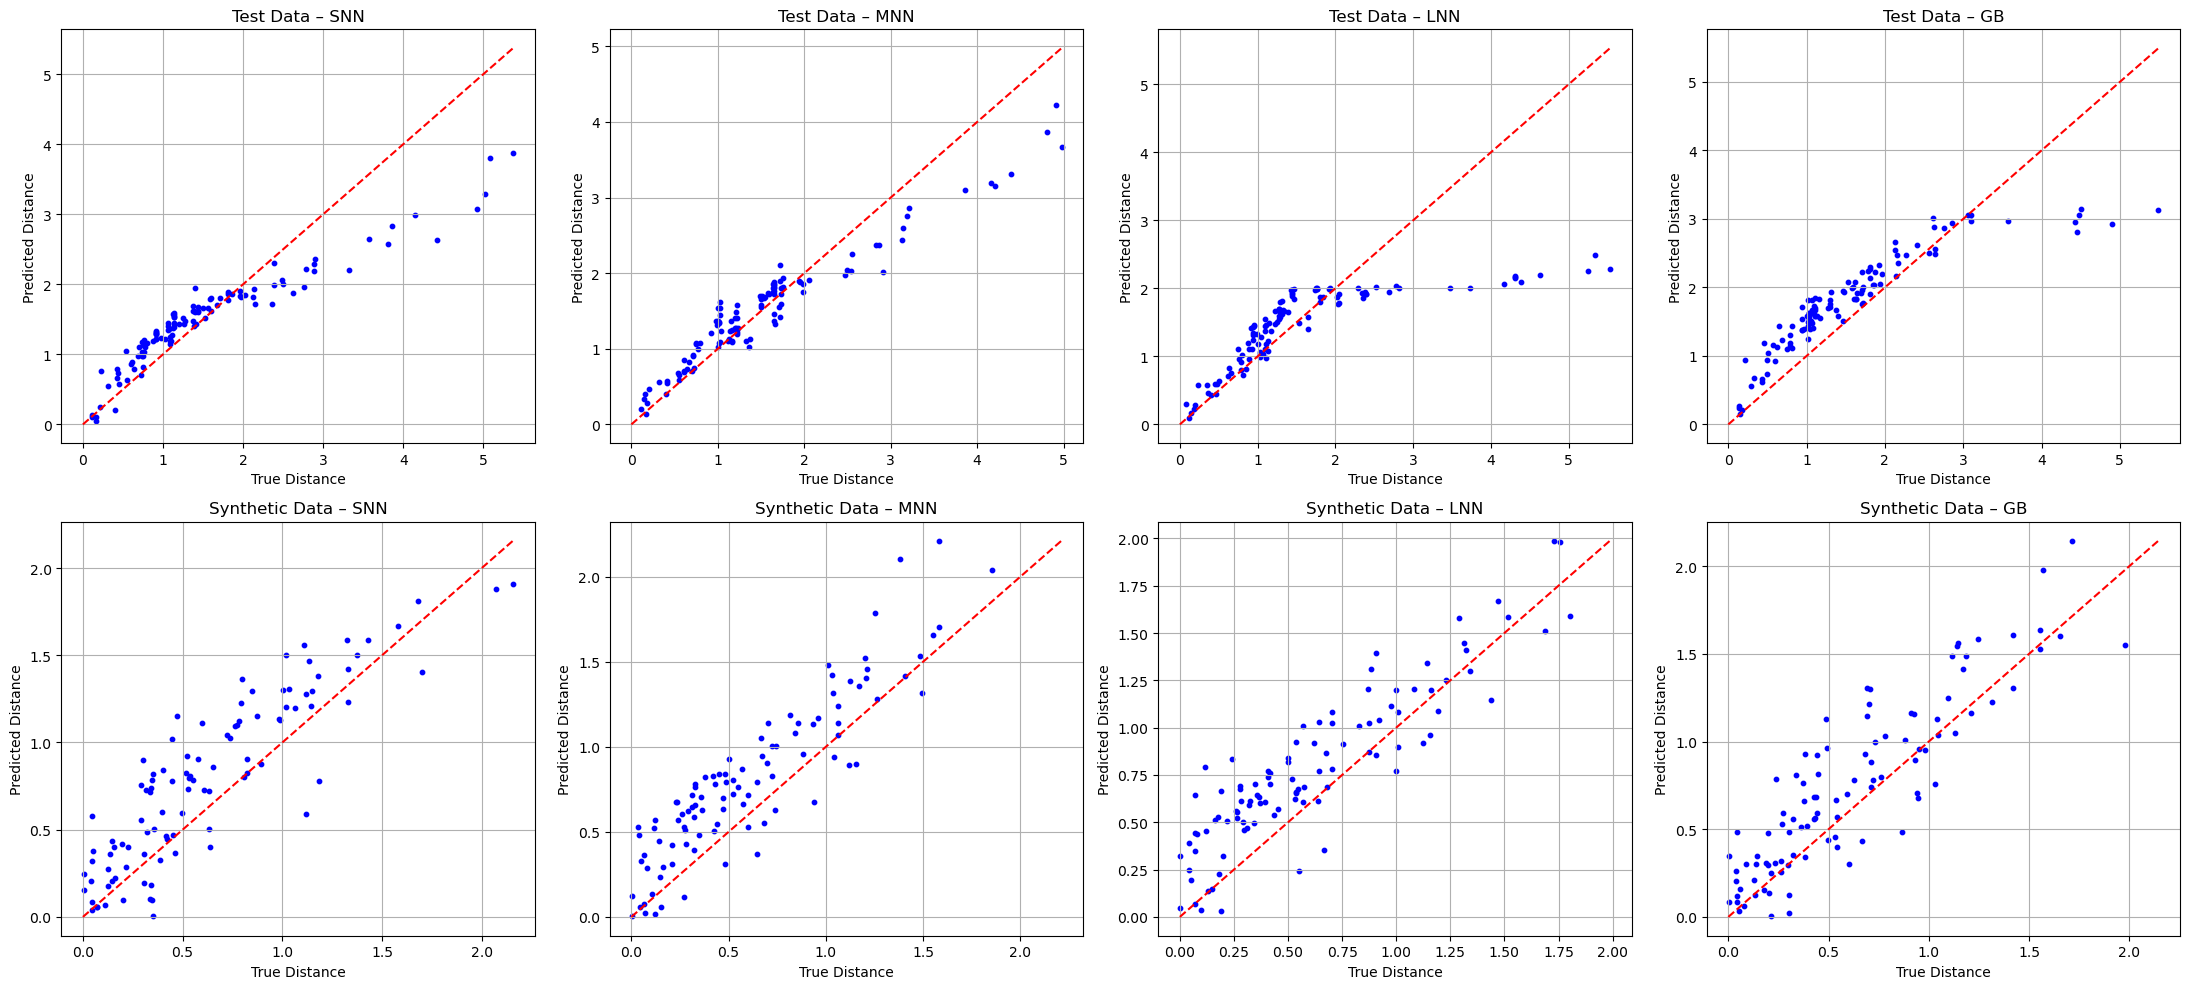


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.294851 0.049278   0.423869  0.081247
     Test Data   MNN  0.303476 0.030396   0.495880  0.089917
     Test Data   LNN  0.391653 0.040978   0.653384  0.112480
     Test Data    GB  0.490484 0.045739   0.609598  0.047344
Synthetic Data   SNN  0.239880 0.005429   0.302281  0.012771
Synthetic Data   MNN  0.238448 0.009369   0.288838  0.012368
Synthetic Data   LNN  0.240463 0.016511   0.292138  0.022136
Synthetic Data    GB  0.215436 0.013420   0.269079  0.016987


In [5]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

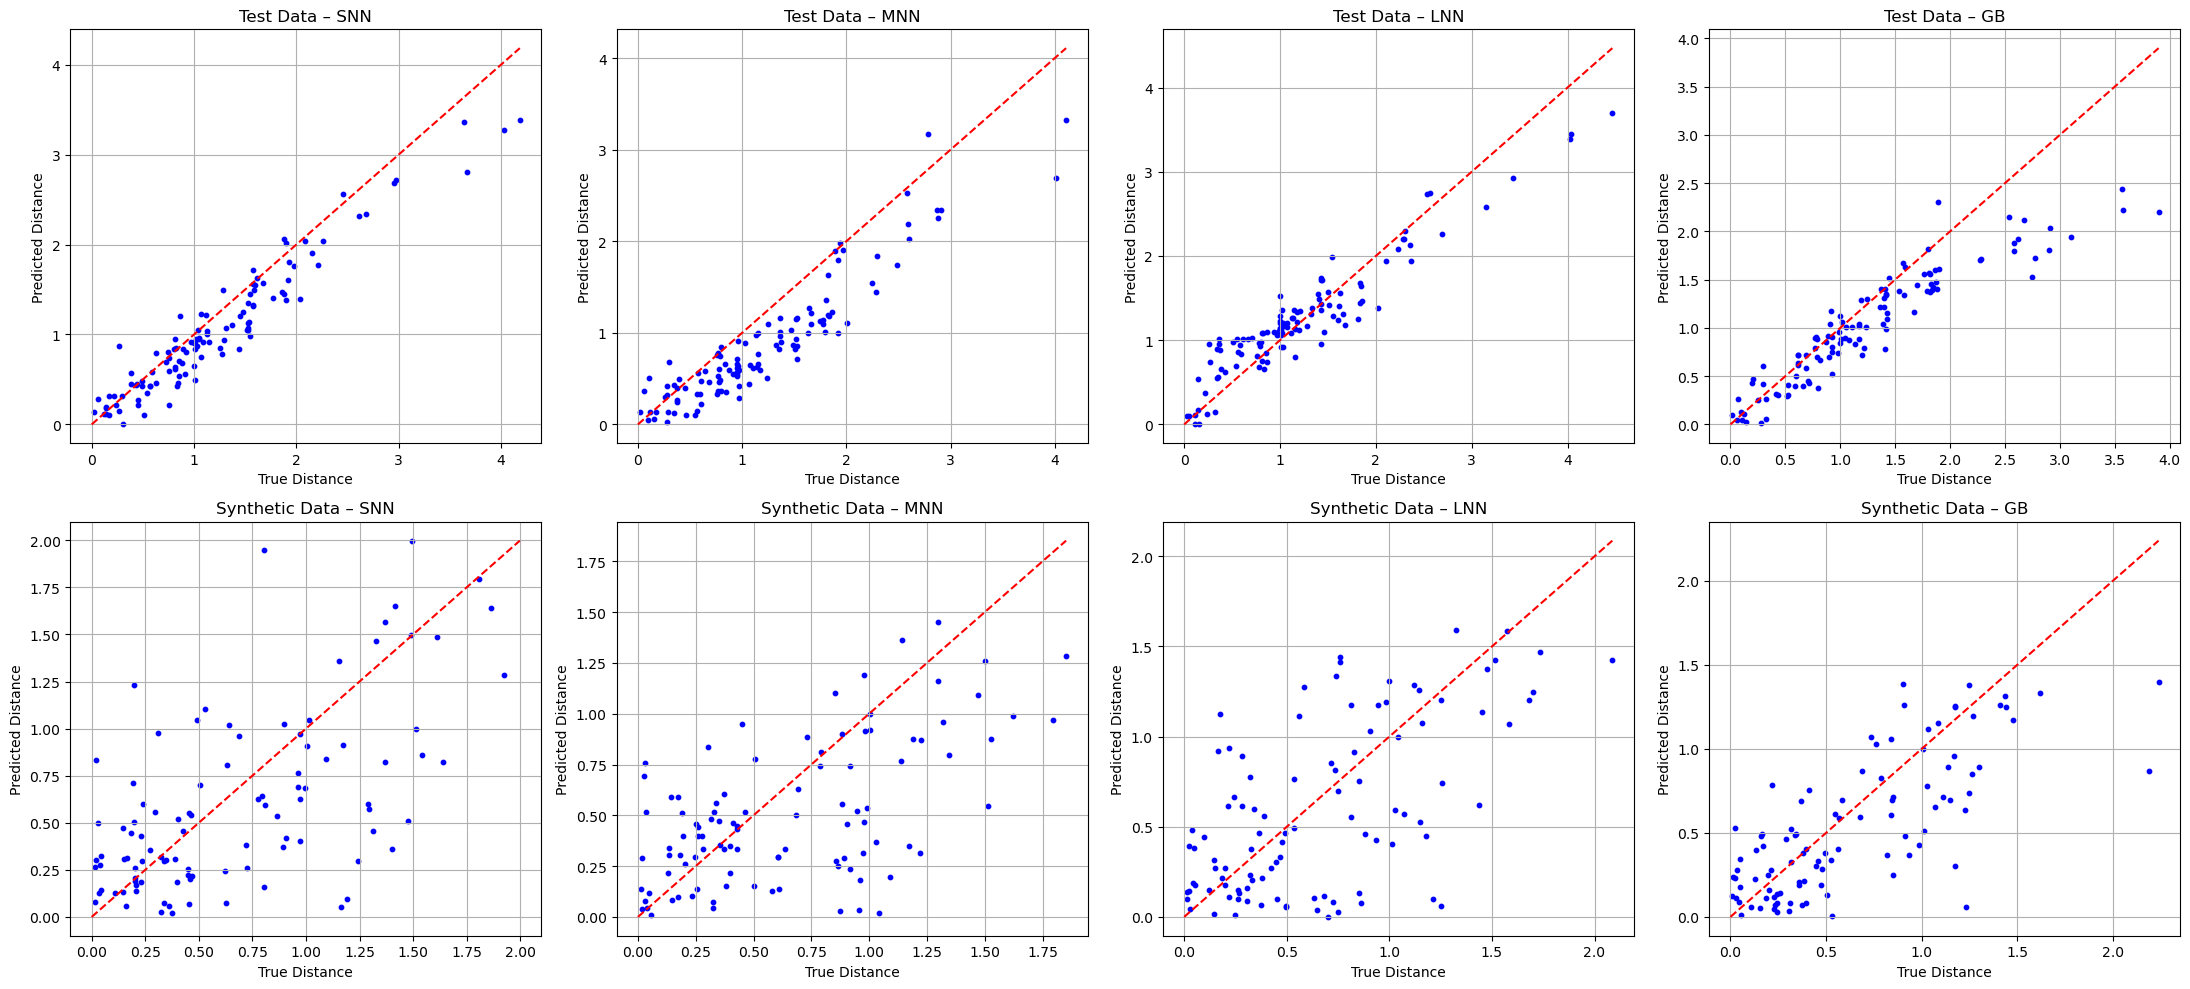


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.246400 0.030179   0.310145  0.029557
     Test Data   MNN  0.309784 0.066881   0.387601  0.070776
     Test Data   LNN  0.258128 0.026848   0.340616  0.039003
     Test Data    GB  0.253476 0.023945   0.382365  0.038777
Synthetic Data   SNN  0.298912 0.017981   0.383276  0.030452
Synthetic Data   MNN  0.327112 0.027442   0.423579  0.034089
Synthetic Data   LNN  0.310639 0.011789   0.395950  0.015558
Synthetic Data    GB  0.221133 0.026163   0.296732  0.033719


In [6]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

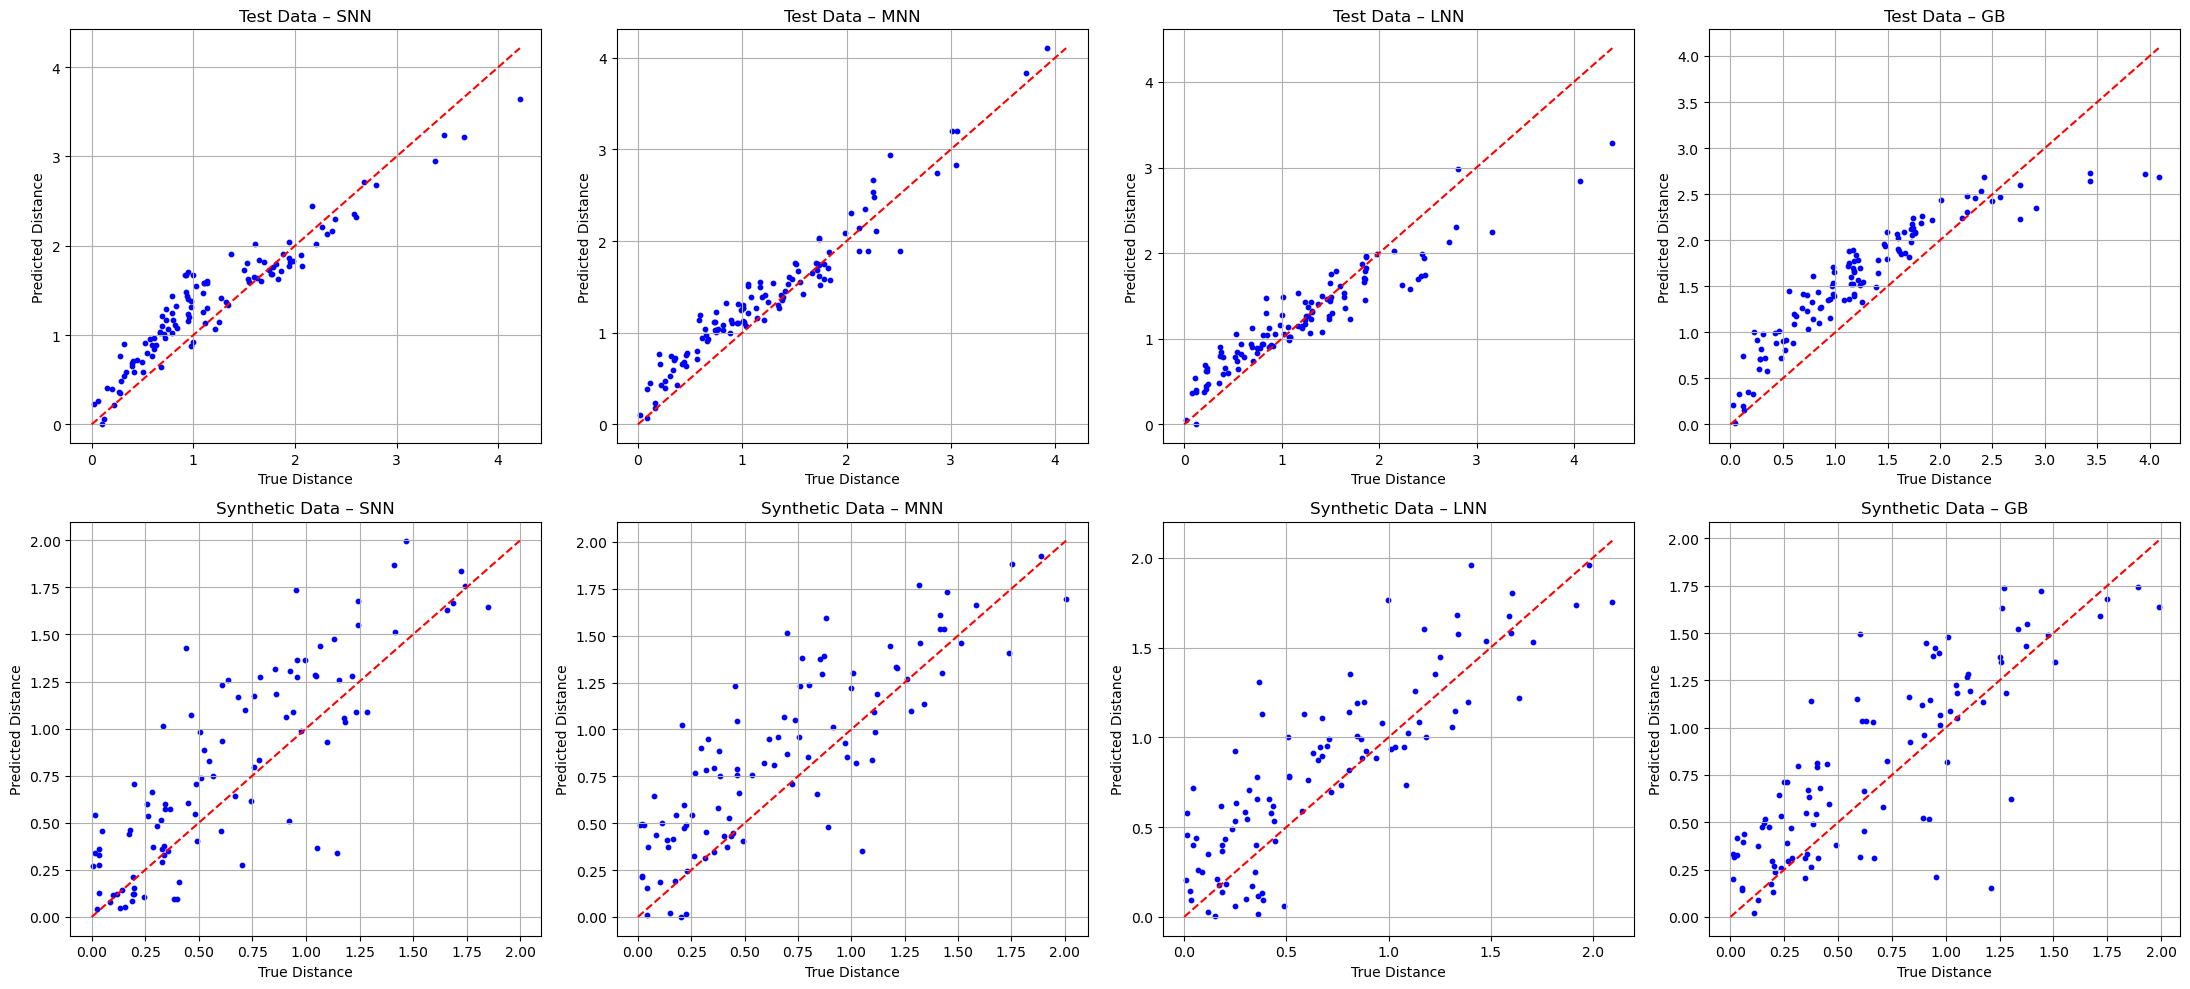


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.239109 0.024388   0.296014  0.022563
     Test Data   MNN  0.261434 0.040393   0.349914  0.067944
     Test Data   LNN  0.269747 0.025971   0.372292  0.047420
     Test Data    GB  0.408085 0.059483   0.472842  0.062982
Synthetic Data   SNN  0.231272 0.017698   0.290477  0.023273
Synthetic Data   MNN  0.261271 0.009421   0.316172  0.014368
Synthetic Data   LNN  0.264756 0.025933   0.327594  0.026773
Synthetic Data    GB  0.231665 0.010856   0.289480  0.017031


In [7]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

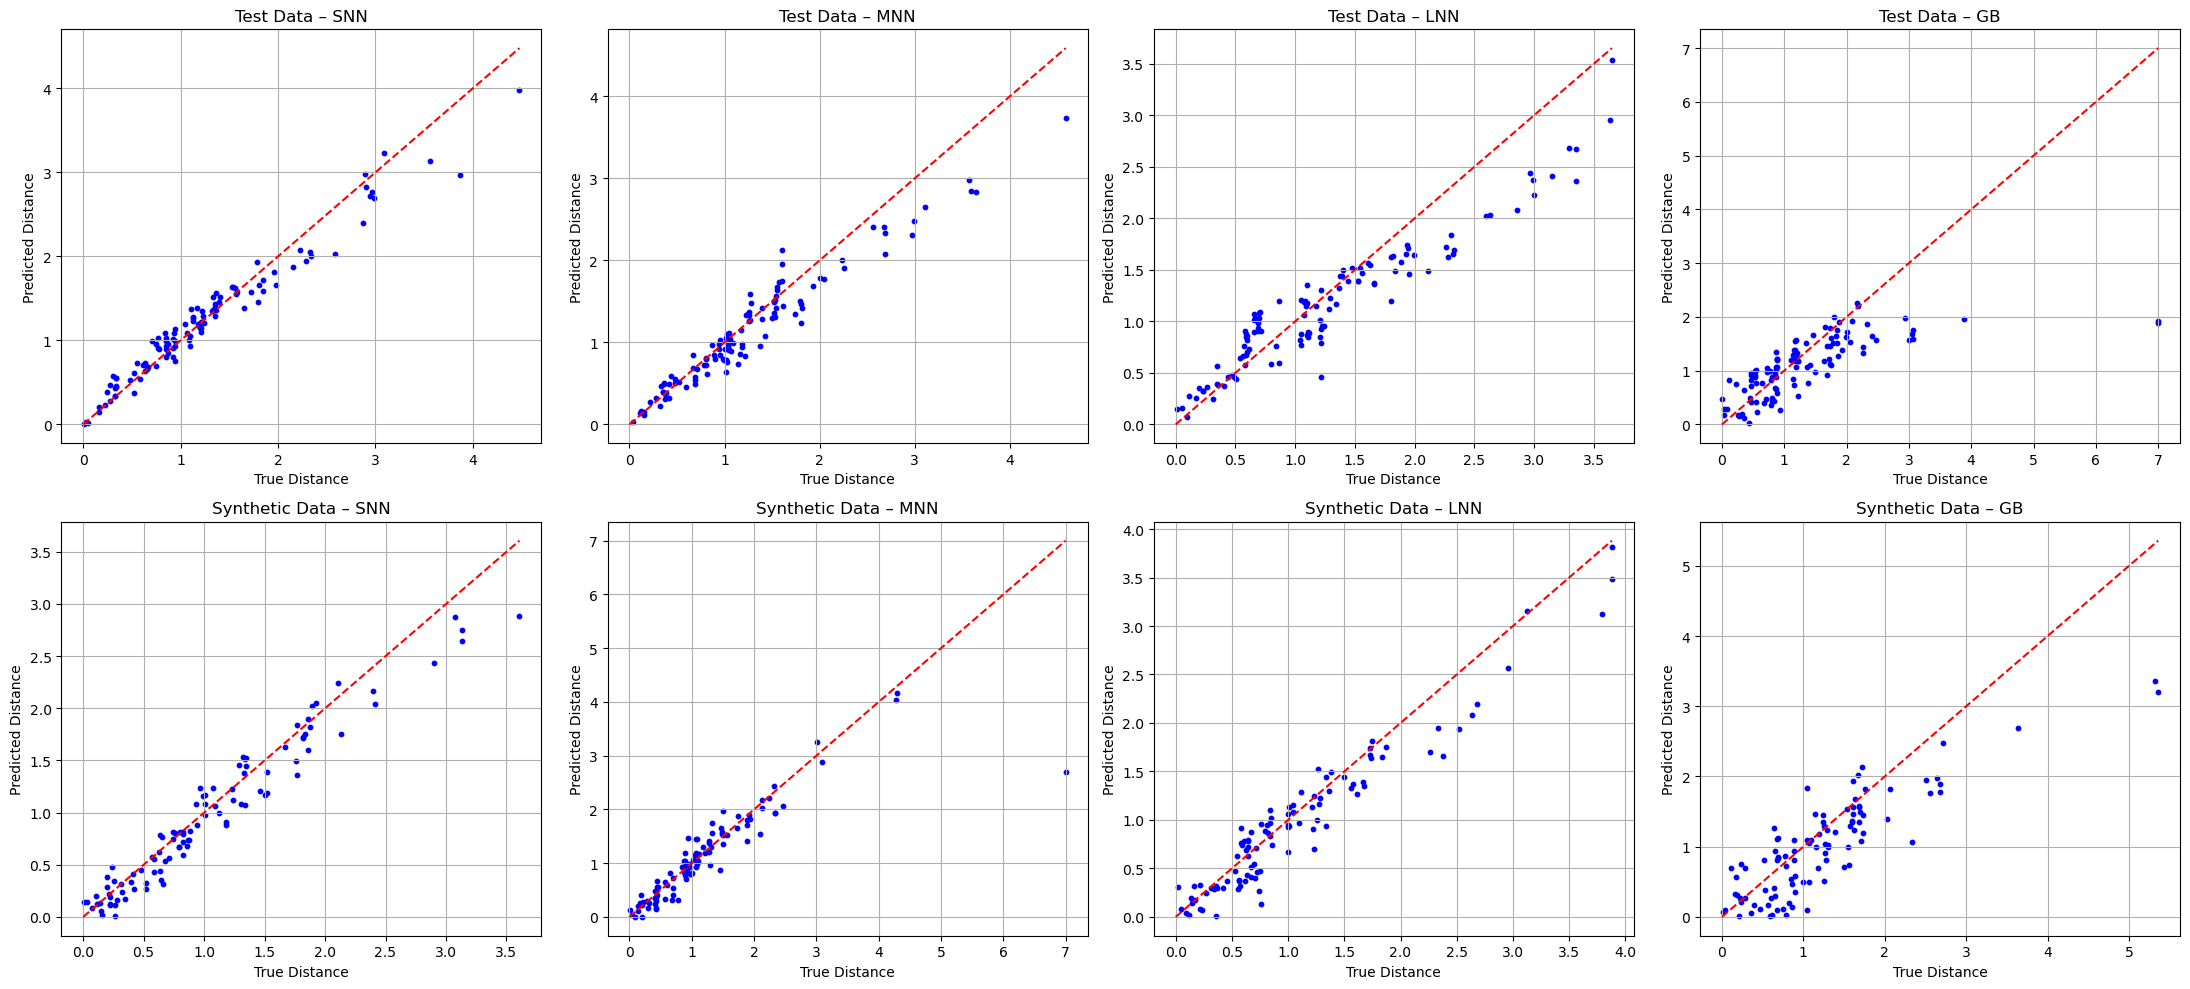


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.184977 0.041863   0.268426  0.095363
     Test Data   MNN  0.171345 0.019244   0.238184  0.028089
     Test Data   LNN  0.241264 0.052708   0.323467  0.082250
     Test Data    GB  0.359144 0.076825   0.657596  0.234196
Synthetic Data   SNN  0.176622 0.035230   0.279582  0.120466
Synthetic Data   MNN  0.217933 0.077390   0.367017  0.193018
Synthetic Data   LNN  0.225141 0.038440   0.378208  0.128514
Synthetic Data    GB  0.381938 0.039840   0.487360  0.056013


In [8]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

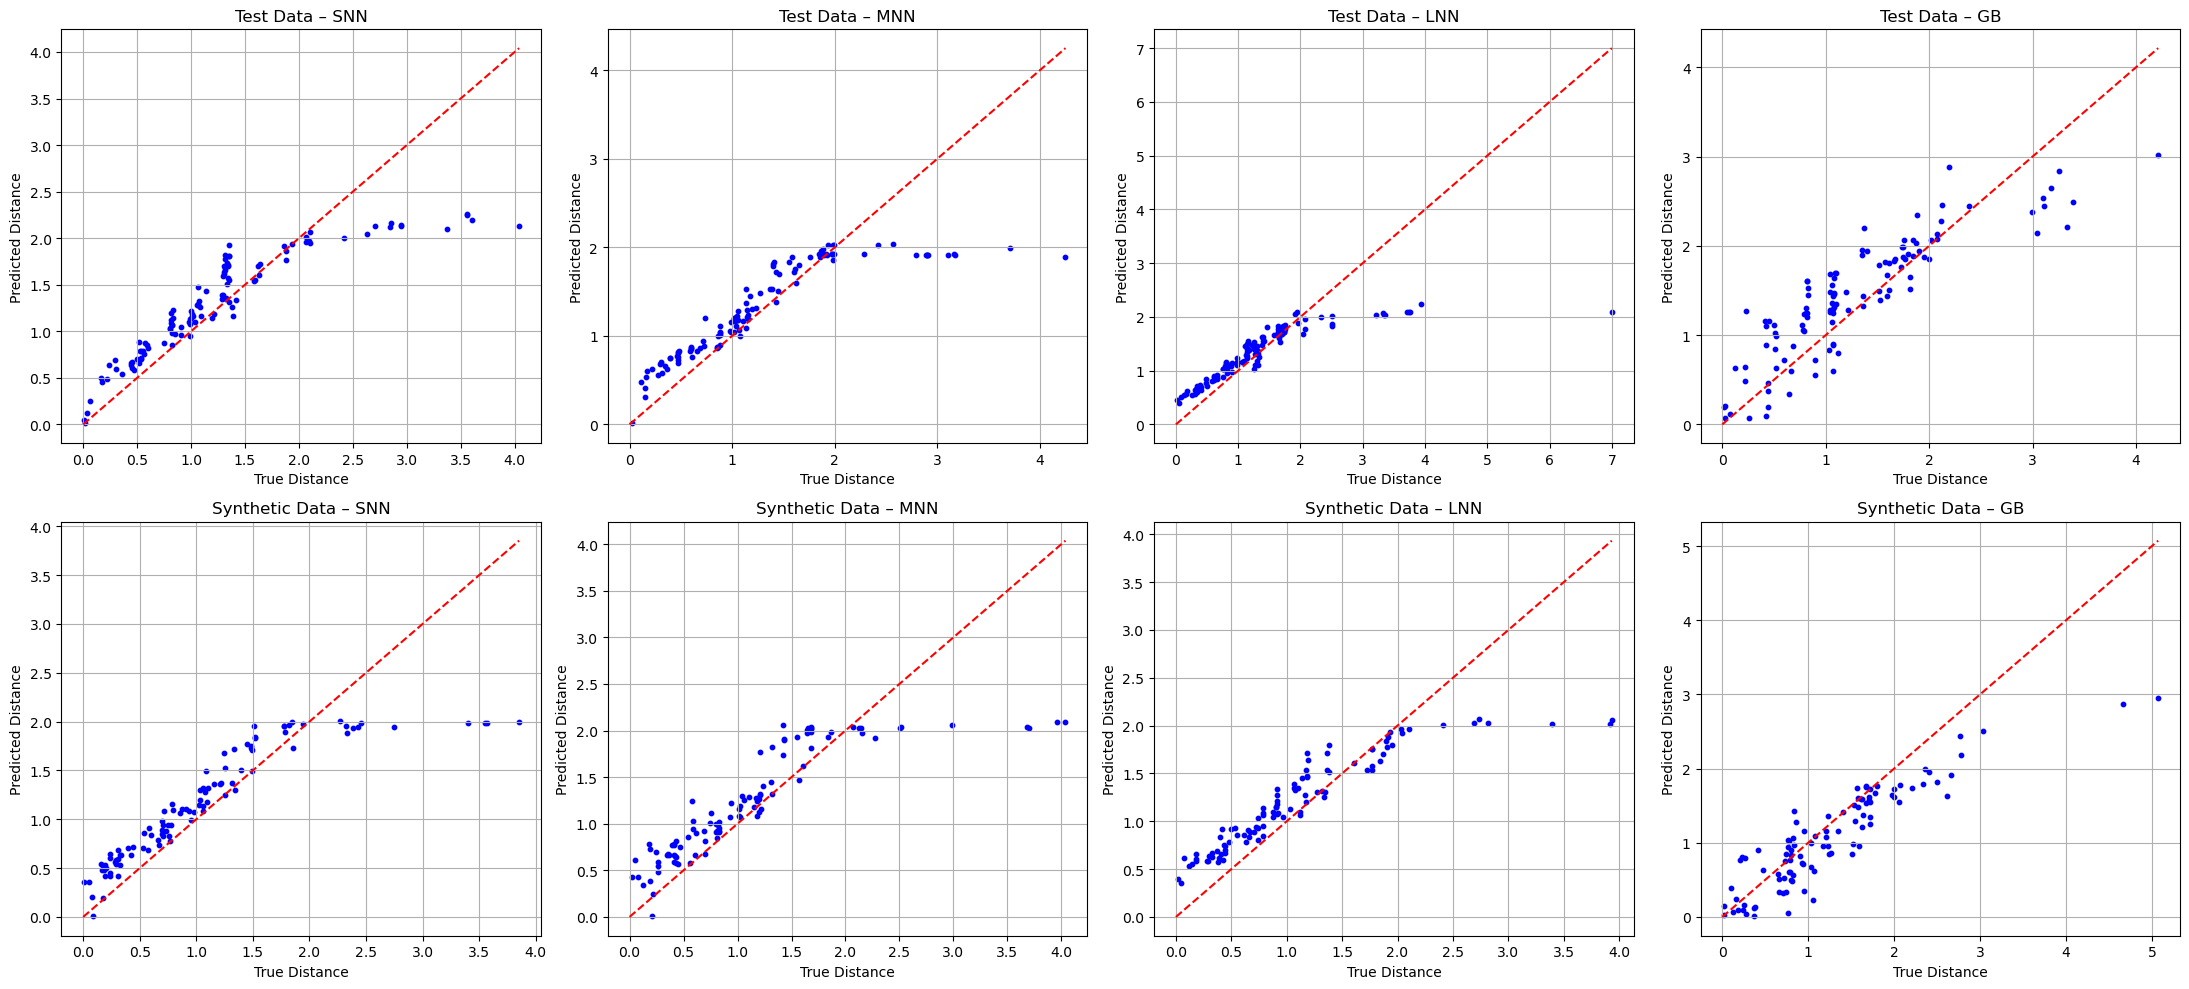


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.290417 0.056081   0.424875  0.169287
     Test Data   MNN  0.301713 0.037642   0.442640  0.079315
     Test Data   LNN  0.310666 0.035759   0.557534  0.109414
     Test Data    GB  0.349670 0.042229   0.452630  0.040937
Synthetic Data   SNN  0.332944 0.073822   0.570995  0.227697
Synthetic Data   MNN  0.315631 0.035948   0.507493  0.168429
Synthetic Data   LNN  0.305873 0.044548   0.467805  0.058000
Synthetic Data    GB  0.316794 0.023081   0.443735  0.037766


In [9]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS4_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Rice dataset

In [10]:
# Import dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
X = rice_cammeo_and_osmancik.data.features.values
X = normalize(X)
y = np.where(rice_cammeo_and_osmancik.data.targets.values.flatten() == 'Cammeo', 1.,0.)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 7))

### Black box 1: Random Forest classifier

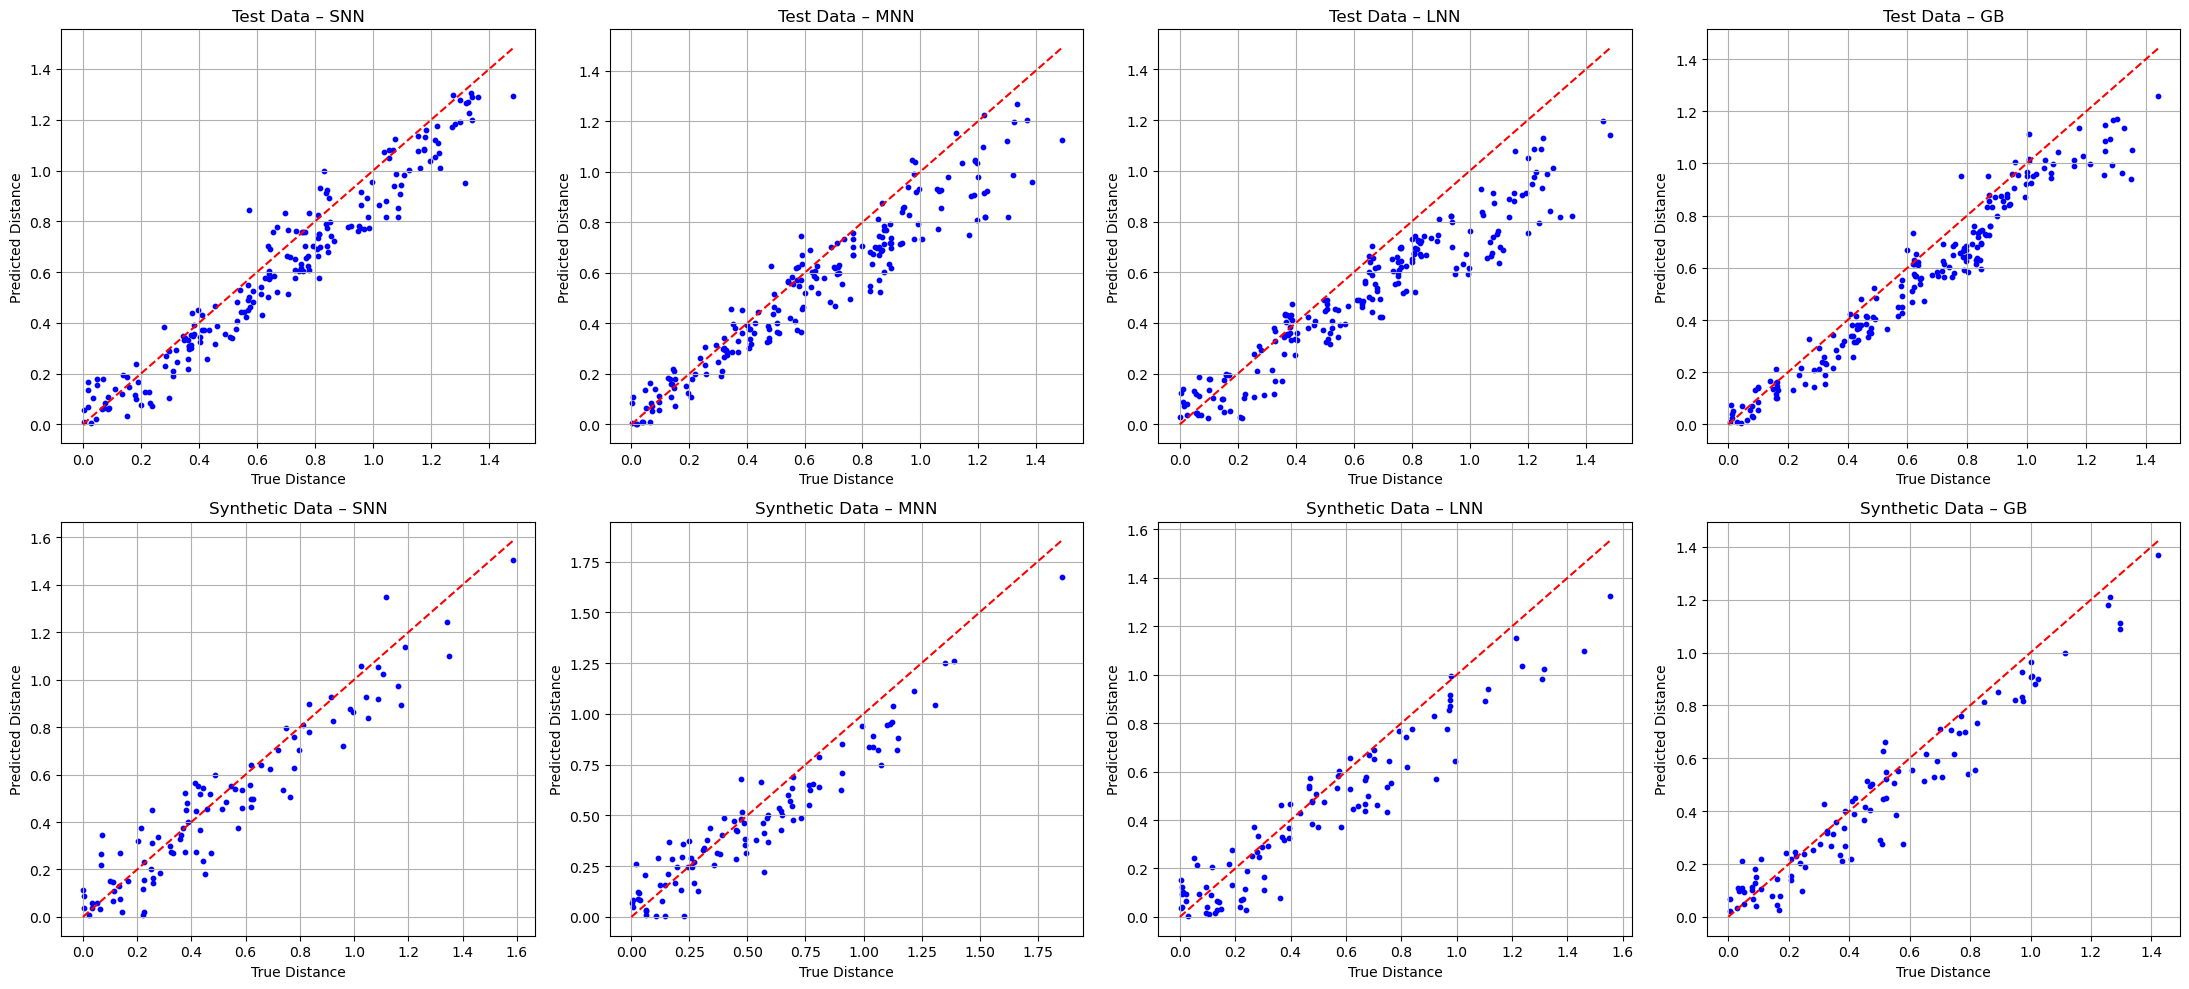


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.082841 0.006607   0.100961  0.006742
     Test Data   MNN  0.082389 0.016711   0.107463  0.023367
     Test Data   LNN  0.089974 0.030293   0.116023  0.038127
     Test Data    GB  0.085644 0.006137   0.109558  0.006091
Synthetic Data   SNN  0.086624 0.006492   0.112036  0.007834
Synthetic Data   MNN  0.084792 0.015965   0.109410  0.017012
Synthetic Data   LNN  0.090996 0.015151   0.117911  0.019194
Synthetic Data    GB  0.079420 0.006355   0.105161  0.011610


In [11]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

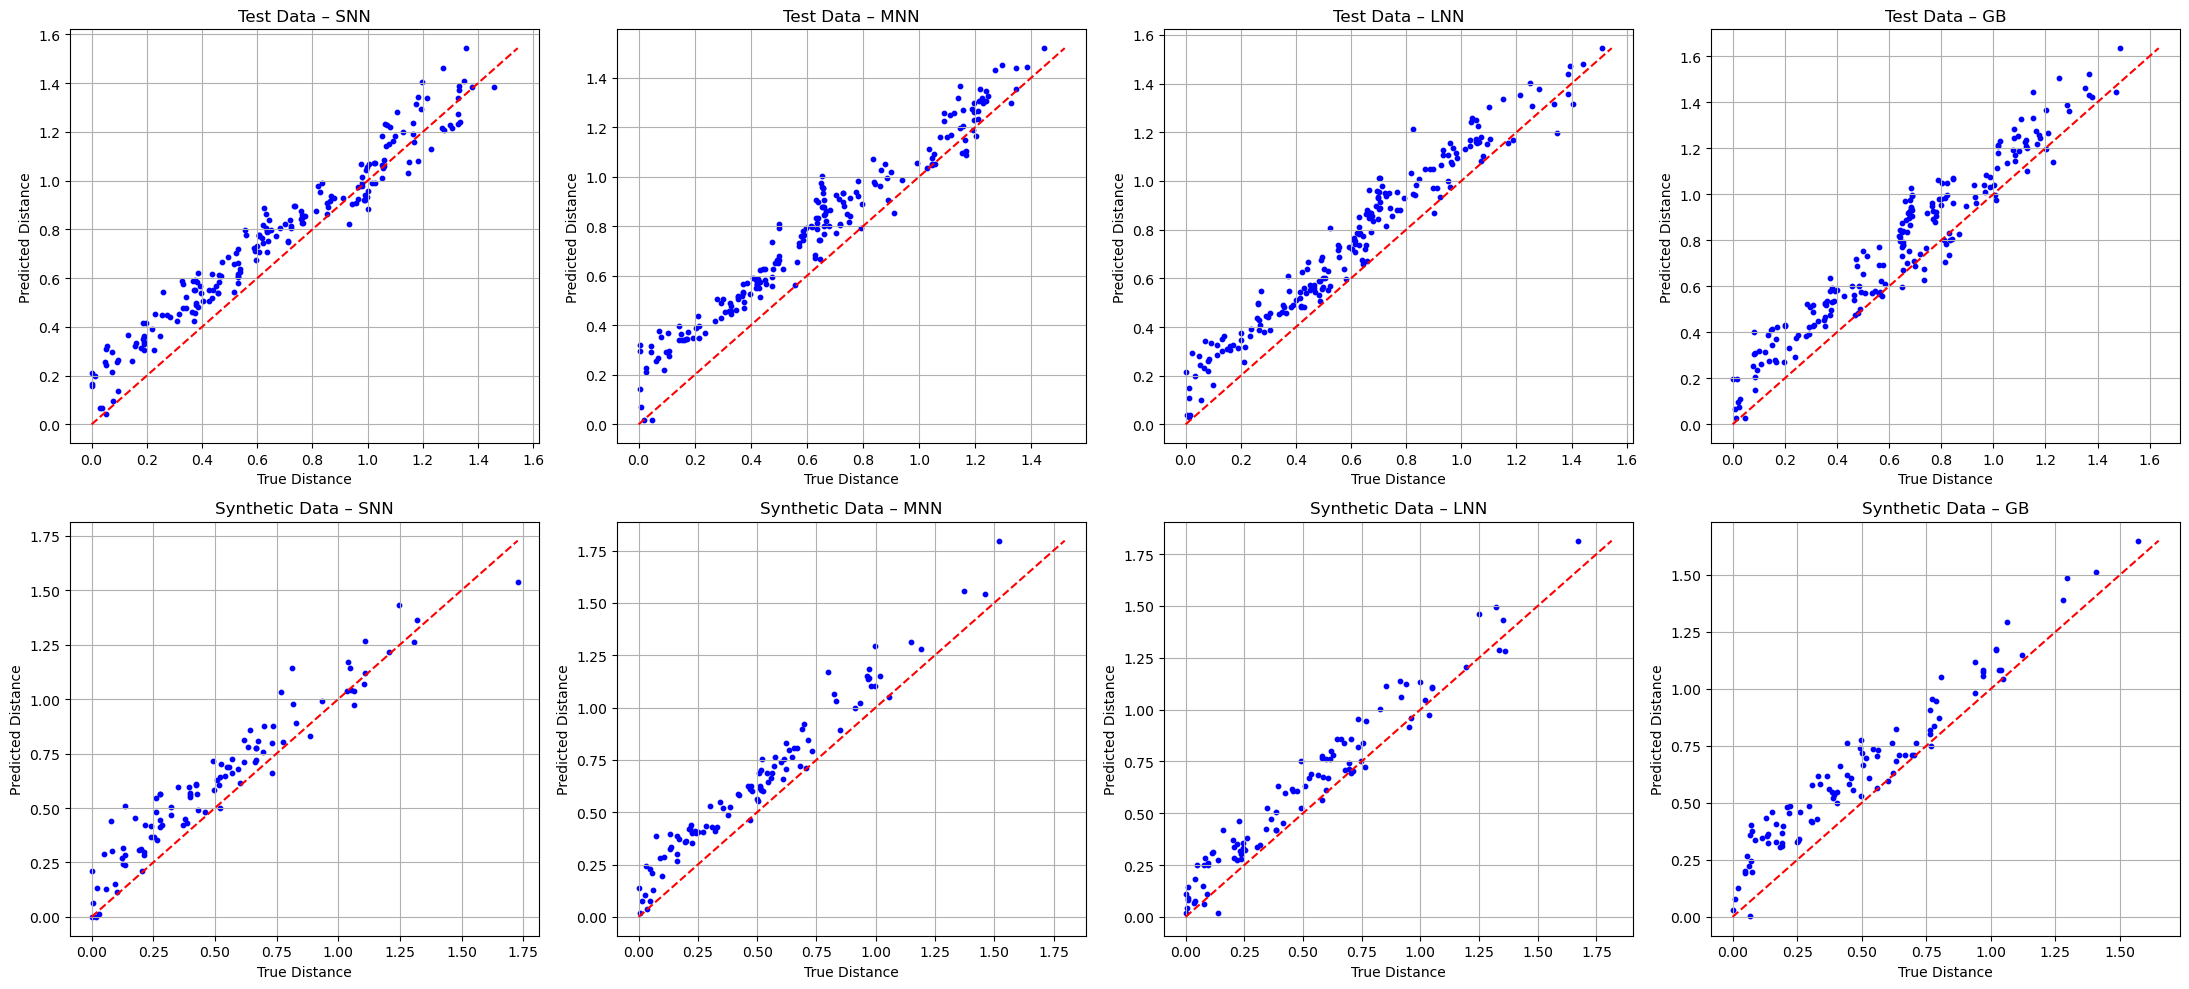


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.131434 0.019887   0.150150  0.018368
     Test Data   MNN  0.141051 0.010688   0.159334  0.010764
     Test Data   LNN  0.127584 0.006154   0.146514  0.004746
     Test Data    GB  0.118826 0.011677   0.138944  0.012275
Synthetic Data   SNN  0.146468 0.027149   0.172395  0.026405
Synthetic Data   MNN  0.149843 0.008932   0.167277  0.009805
Synthetic Data   LNN  0.128747 0.013507   0.148442  0.013574
Synthetic Data    GB  0.131372 0.012853   0.154269  0.015288


In [12]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

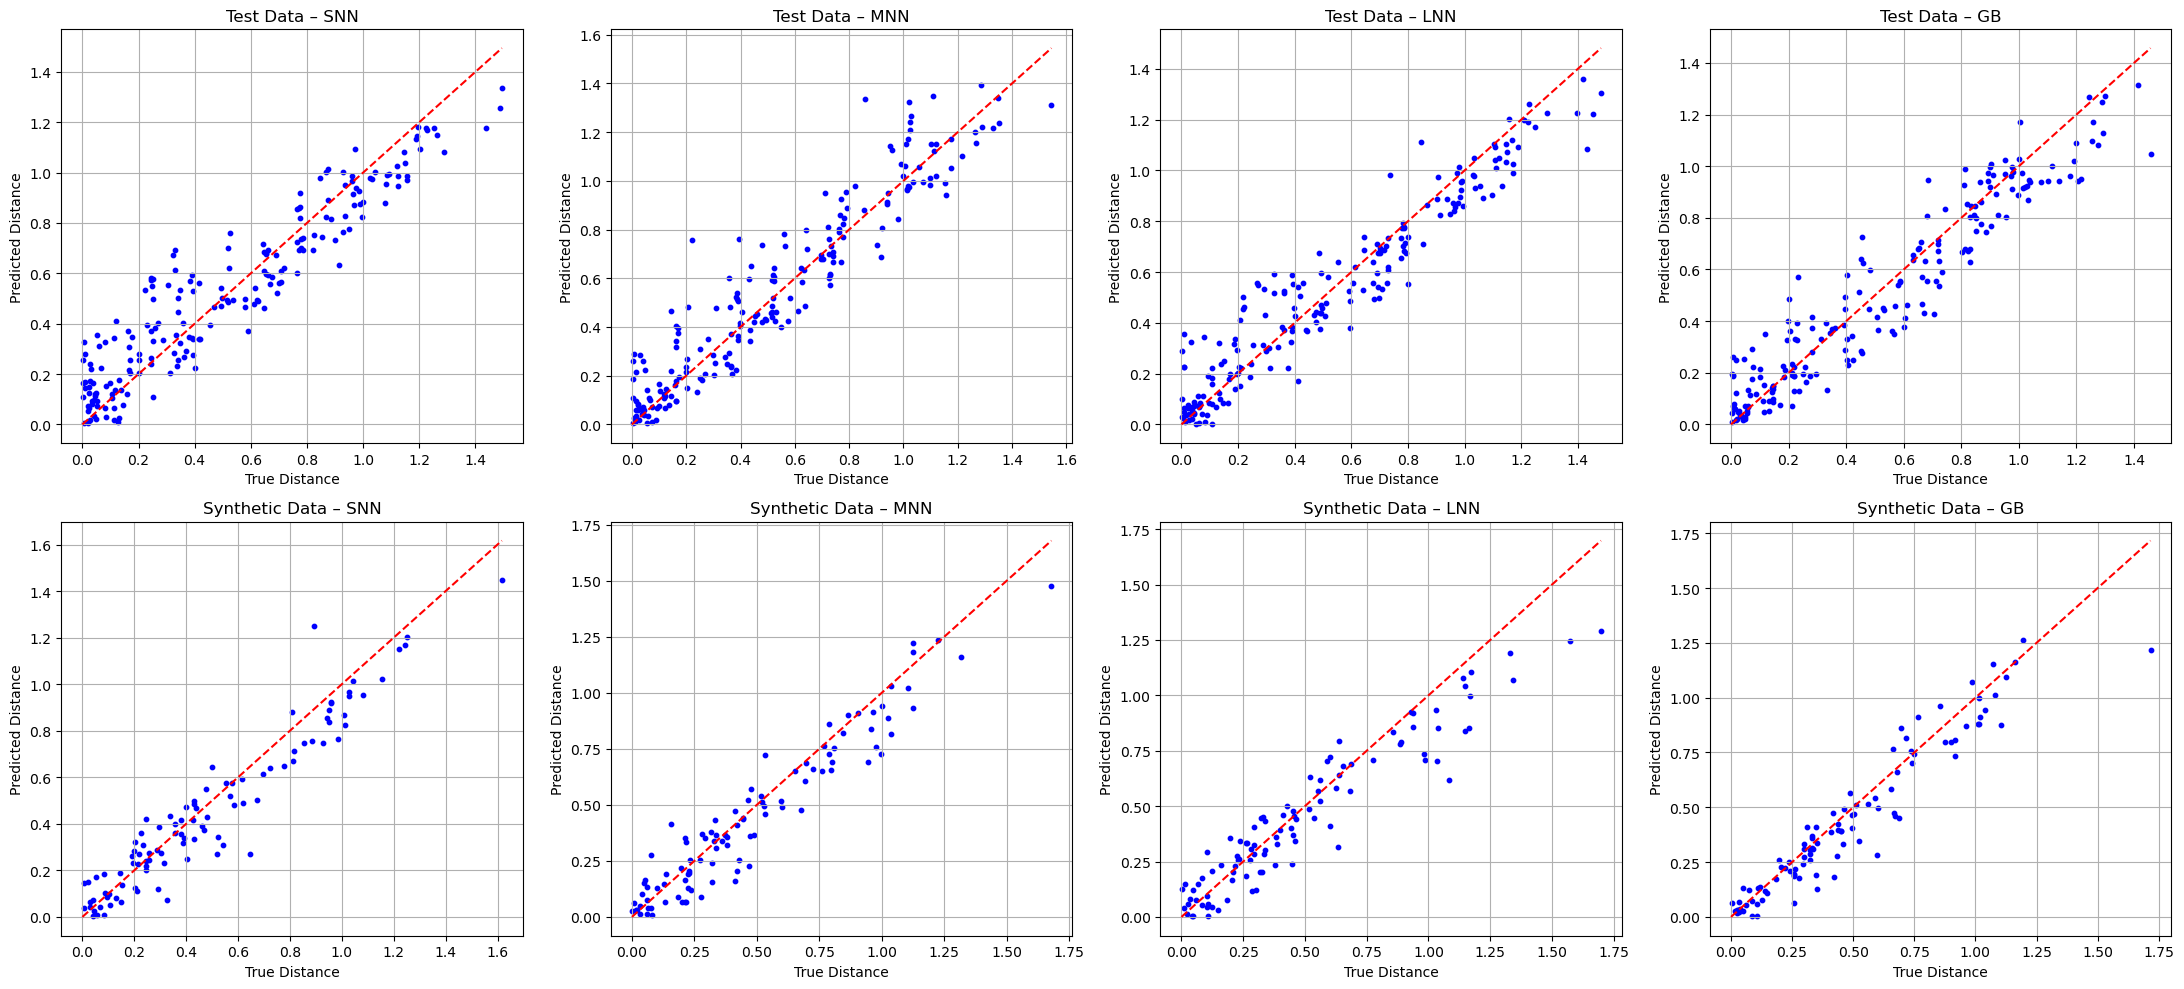


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.121357 0.013018   0.151334  0.015753
     Test Data   MNN  0.106190 0.009126   0.138506  0.009563
     Test Data   LNN  0.121088 0.019648   0.160212  0.023495
     Test Data    GB  0.111120 0.009694   0.142121  0.010241
Synthetic Data   SNN  0.088419 0.002669   0.113228  0.003134
Synthetic Data   MNN  0.096503 0.008606   0.122376  0.007434
Synthetic Data   LNN  0.106753 0.014203   0.142665  0.015556
Synthetic Data    GB  0.077148 0.007851   0.104289  0.008790


In [13]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

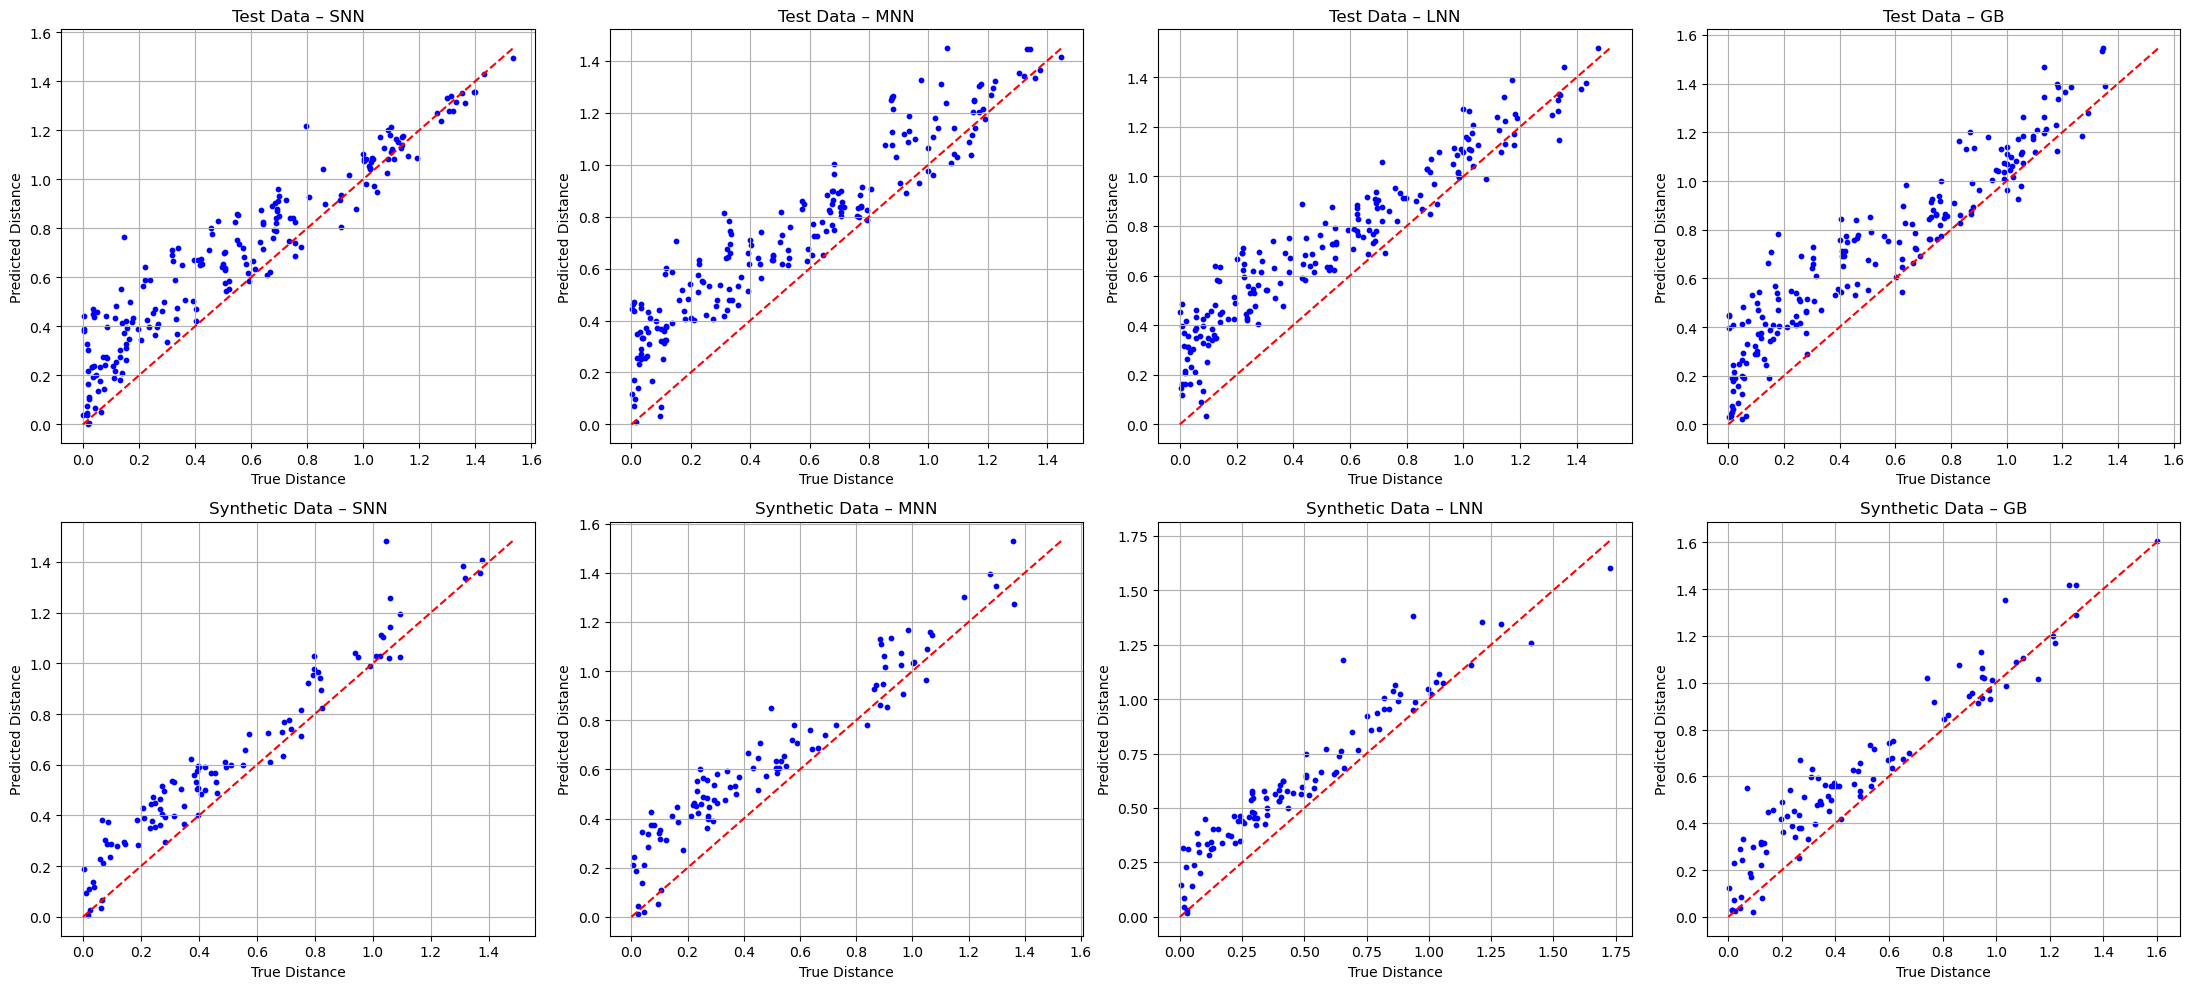


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.180117 0.021526   0.223902  0.026386
     Test Data   MNN  0.203608 0.018150   0.245886  0.019510
     Test Data   LNN  0.203946 0.019152   0.243128  0.022376
     Test Data    GB  0.204731 0.023576   0.249666  0.021923
Synthetic Data   SNN  0.138735 0.011720   0.164744  0.012550
Synthetic Data   MNN  0.165627 0.017931   0.191586  0.019367
Synthetic Data   LNN  0.148869 0.010601   0.170886  0.009856
Synthetic Data    GB  0.148231 0.017098   0.178026  0.016052


In [14]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

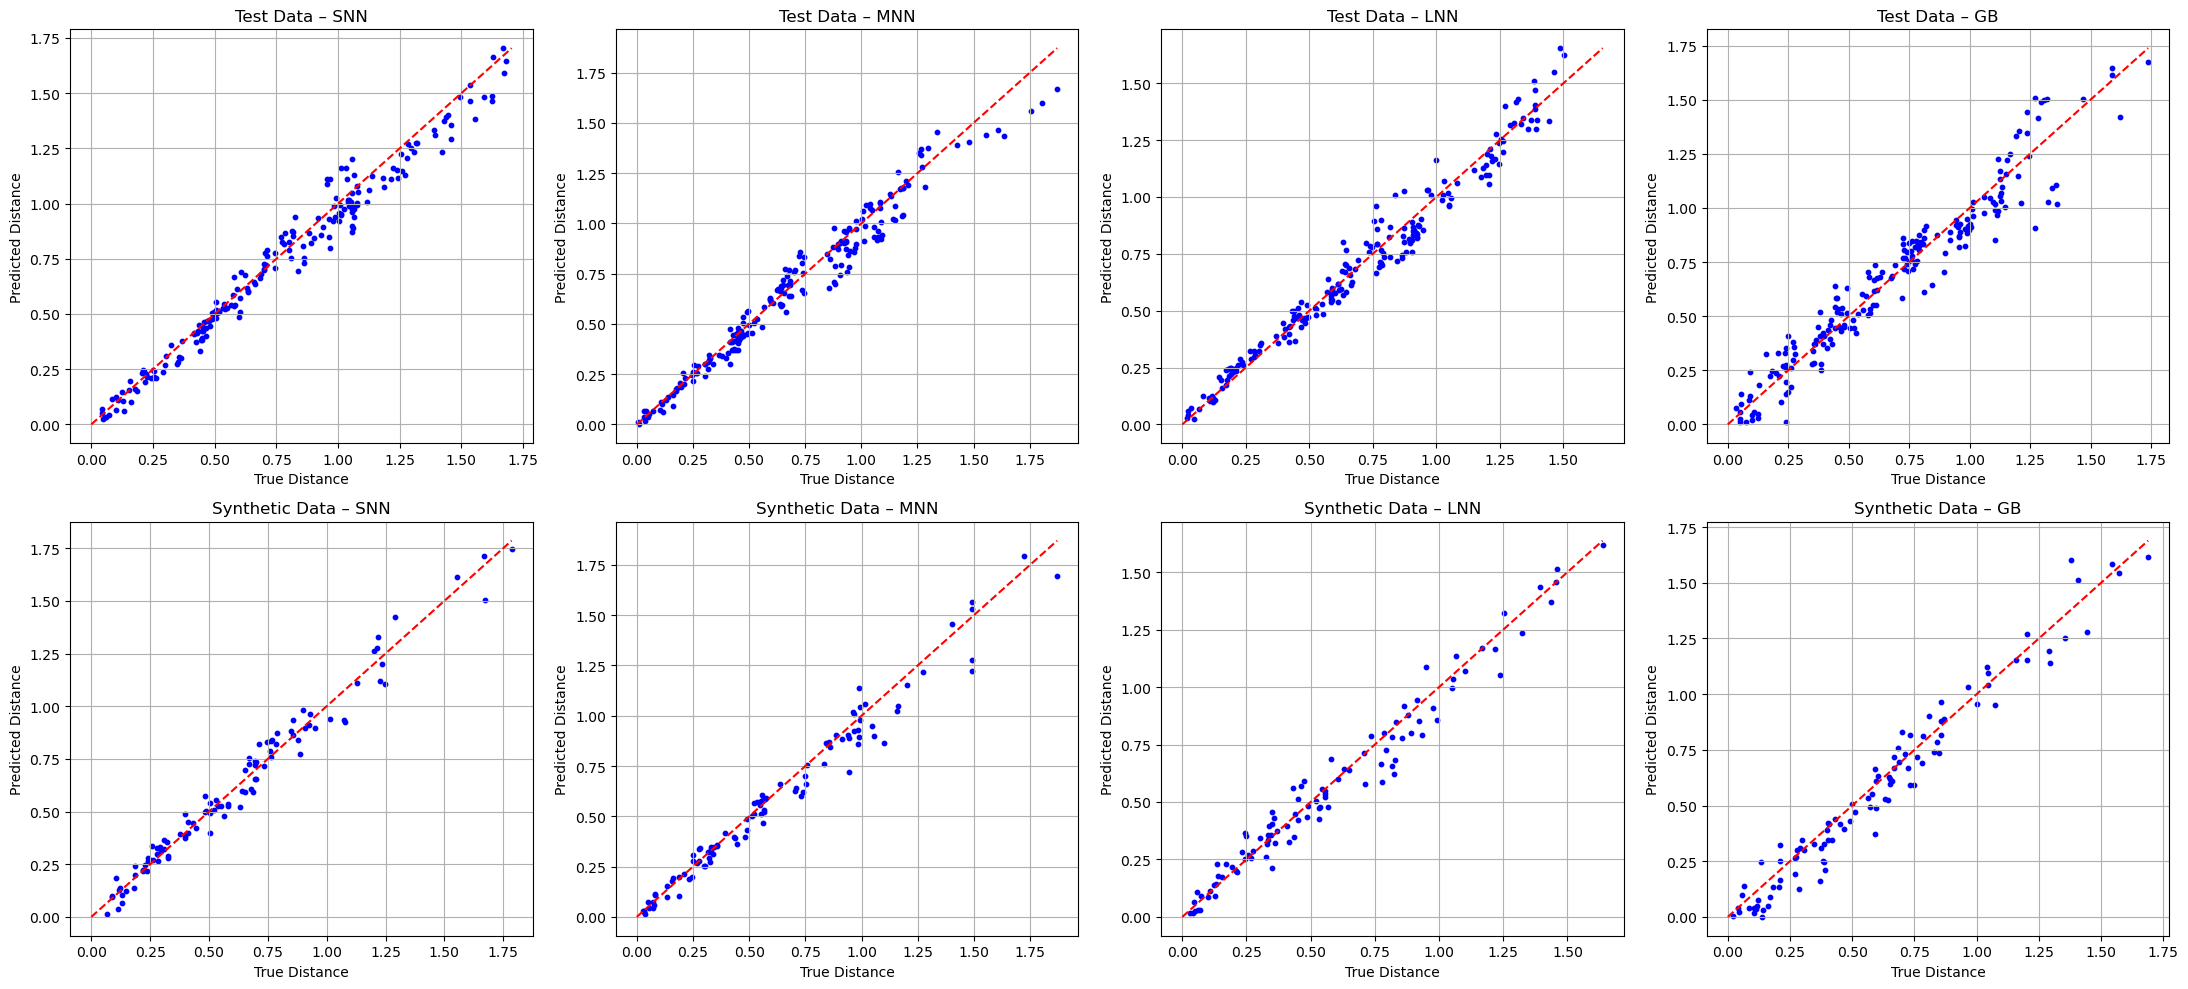


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.056646 0.007938   0.076362  0.012175
     Test Data   MNN  0.059521 0.006245   0.077157  0.006733
     Test Data   LNN  0.056722 0.007368   0.073448  0.009957
     Test Data    GB  0.074530 0.009678   0.097033  0.013465
Synthetic Data   SNN  0.053182 0.003483   0.068943  0.006502
Synthetic Data   MNN  0.053313 0.005149   0.071674  0.009120
Synthetic Data   LNN  0.052274 0.004999   0.070742  0.008664
Synthetic Data    GB  0.070564 0.004857   0.089822  0.005465


In [15]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

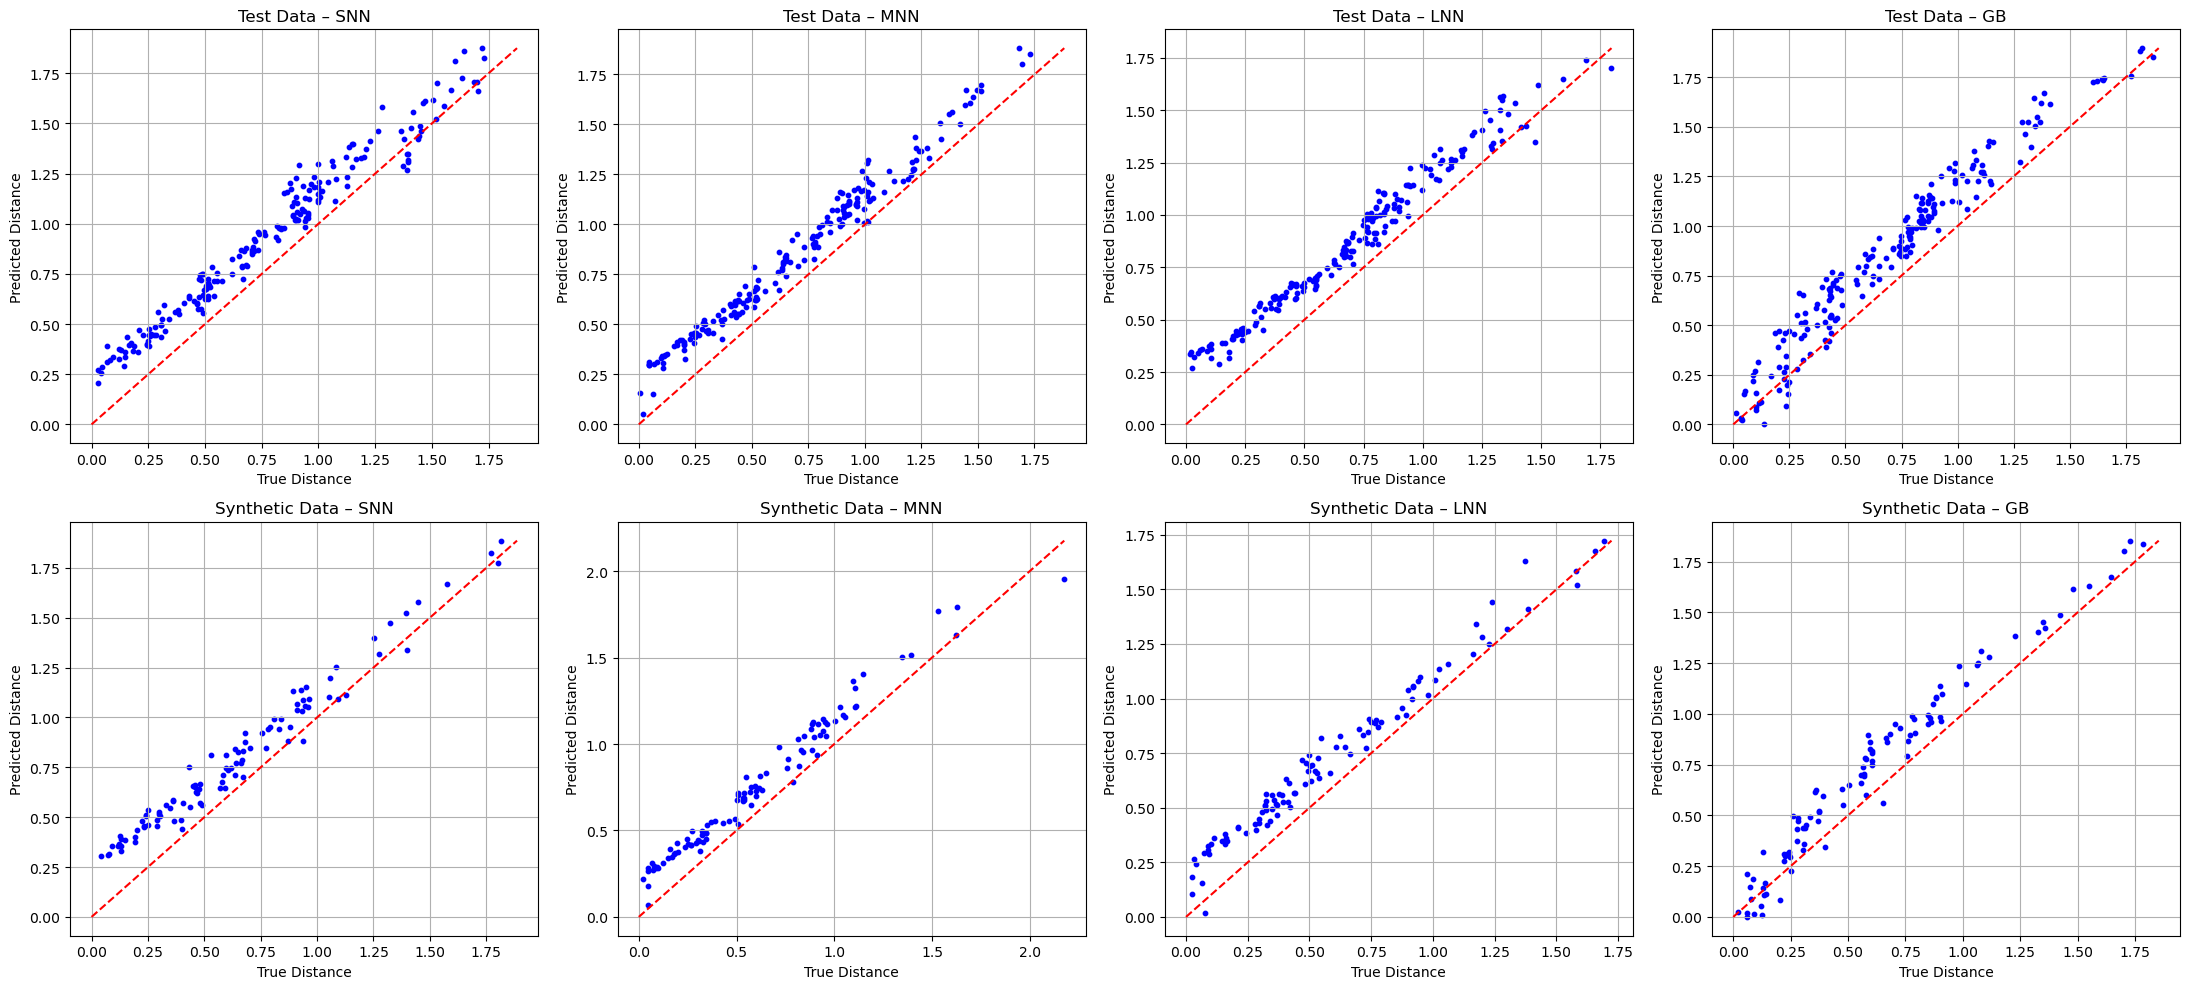


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.150532 0.015085   0.164071  0.015274
     Test Data   MNN  0.166769 0.017288   0.182301  0.017231
     Test Data   LNN  0.155583 0.011018   0.168851  0.009970
     Test Data    GB  0.149713 0.025024   0.171491  0.027915
Synthetic Data   SNN  0.153599 0.013430   0.168715  0.014546
Synthetic Data   MNN  0.151788 0.017062   0.165650  0.017224
Synthetic Data   LNN  0.136814 0.008553   0.150004  0.009858
Synthetic Data    GB  0.119256 0.010847   0.139637  0.011545


In [16]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS5_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Connectionist bench (mines vs rocks) dataset

In [17]:
# Import dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 

X = connectionist_bench_sonar_mines_vs_rocks.data.features.values 
X = normalize(X) 
y = np.where(connectionist_bench_sonar_mines_vs_rocks.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 60))

### Black box 1: Random Forest classifier

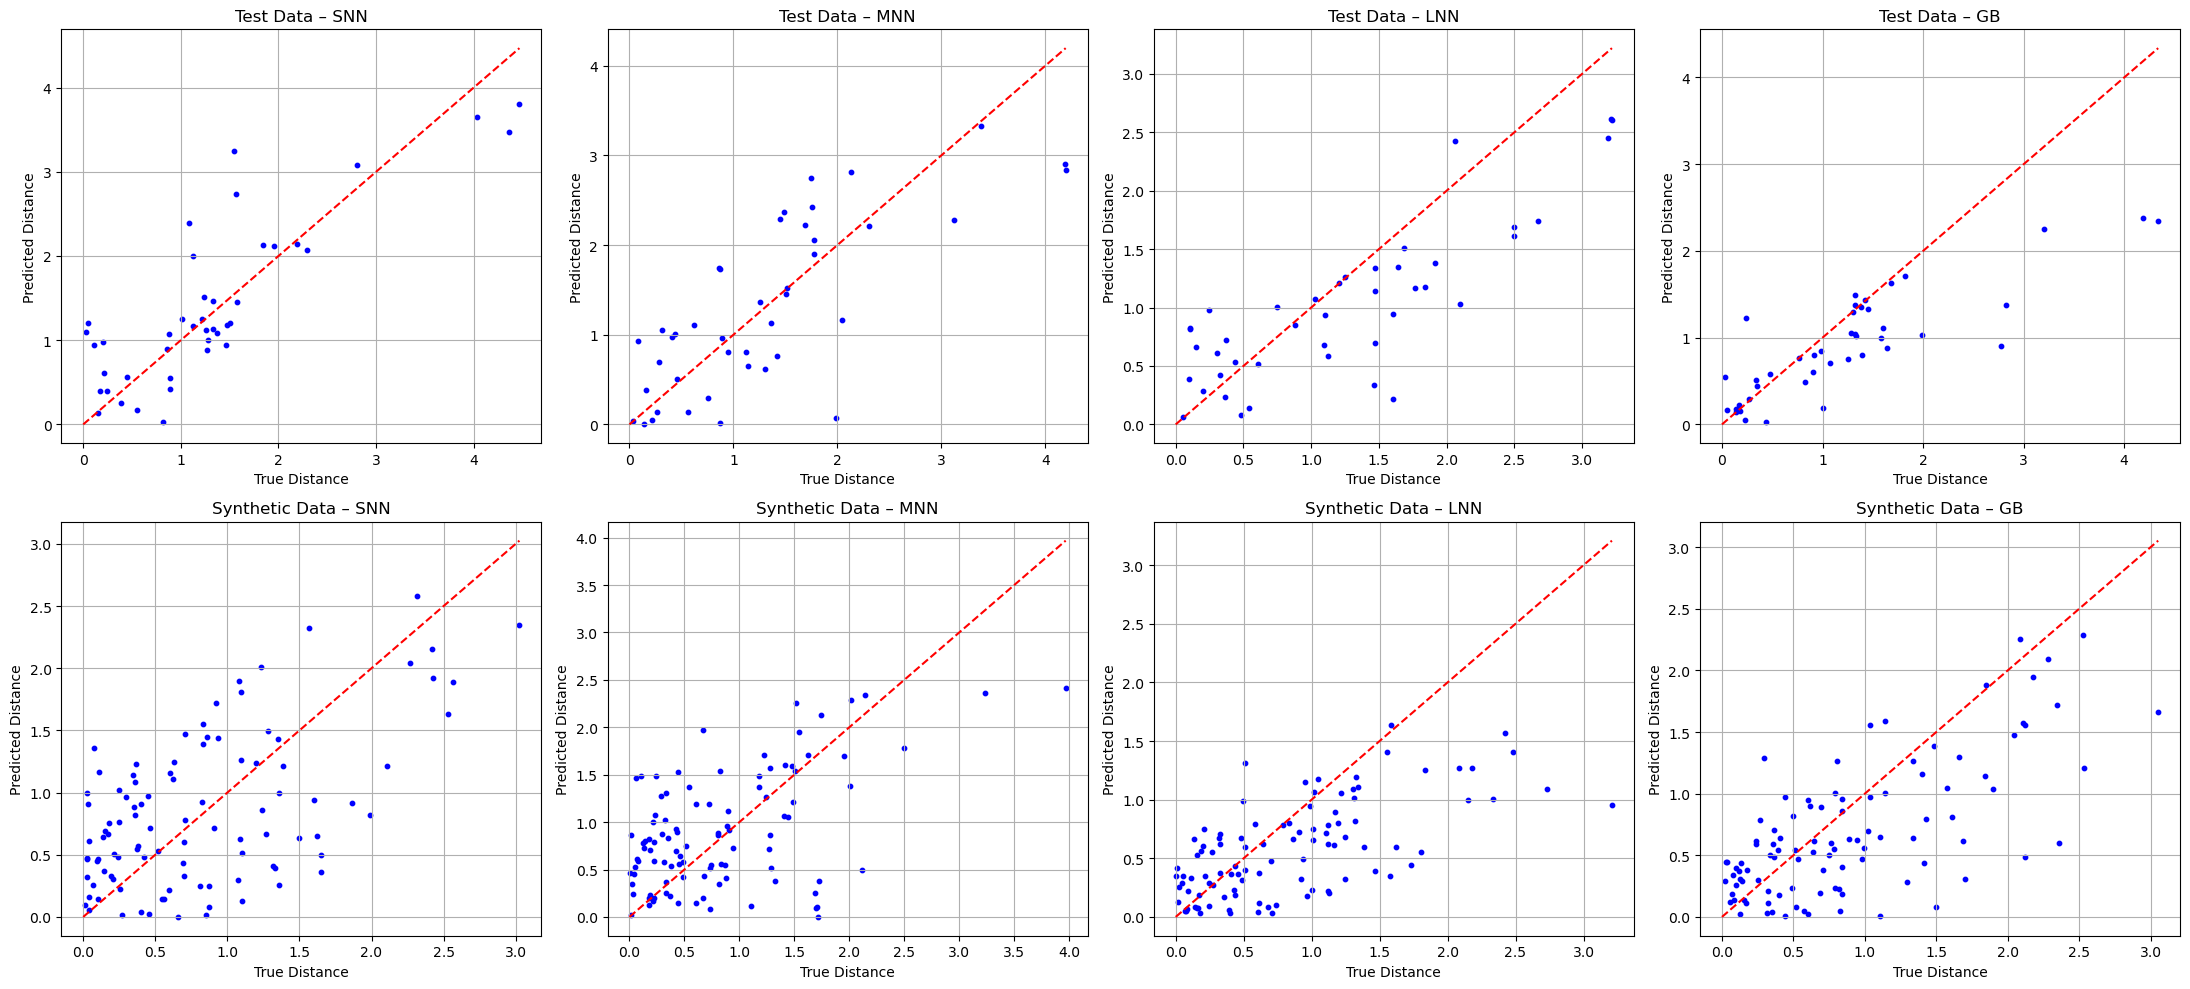


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.493270 0.089061   0.668919  0.134219
     Test Data   MNN  0.591349 0.086650   0.766499  0.128337
     Test Data   LNN  0.522534 0.071532   0.690924  0.102226
     Test Data    GB  0.561103 0.077846   0.765254  0.073960
Synthetic Data   SNN  0.514069 0.038093   0.662021  0.063747
Synthetic Data   MNN  0.463265 0.034652   0.614793  0.038772
Synthetic Data   LNN  0.445417 0.037189   0.584143  0.035355
Synthetic Data    GB  0.418469 0.037646   0.579593  0.044728


In [18]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

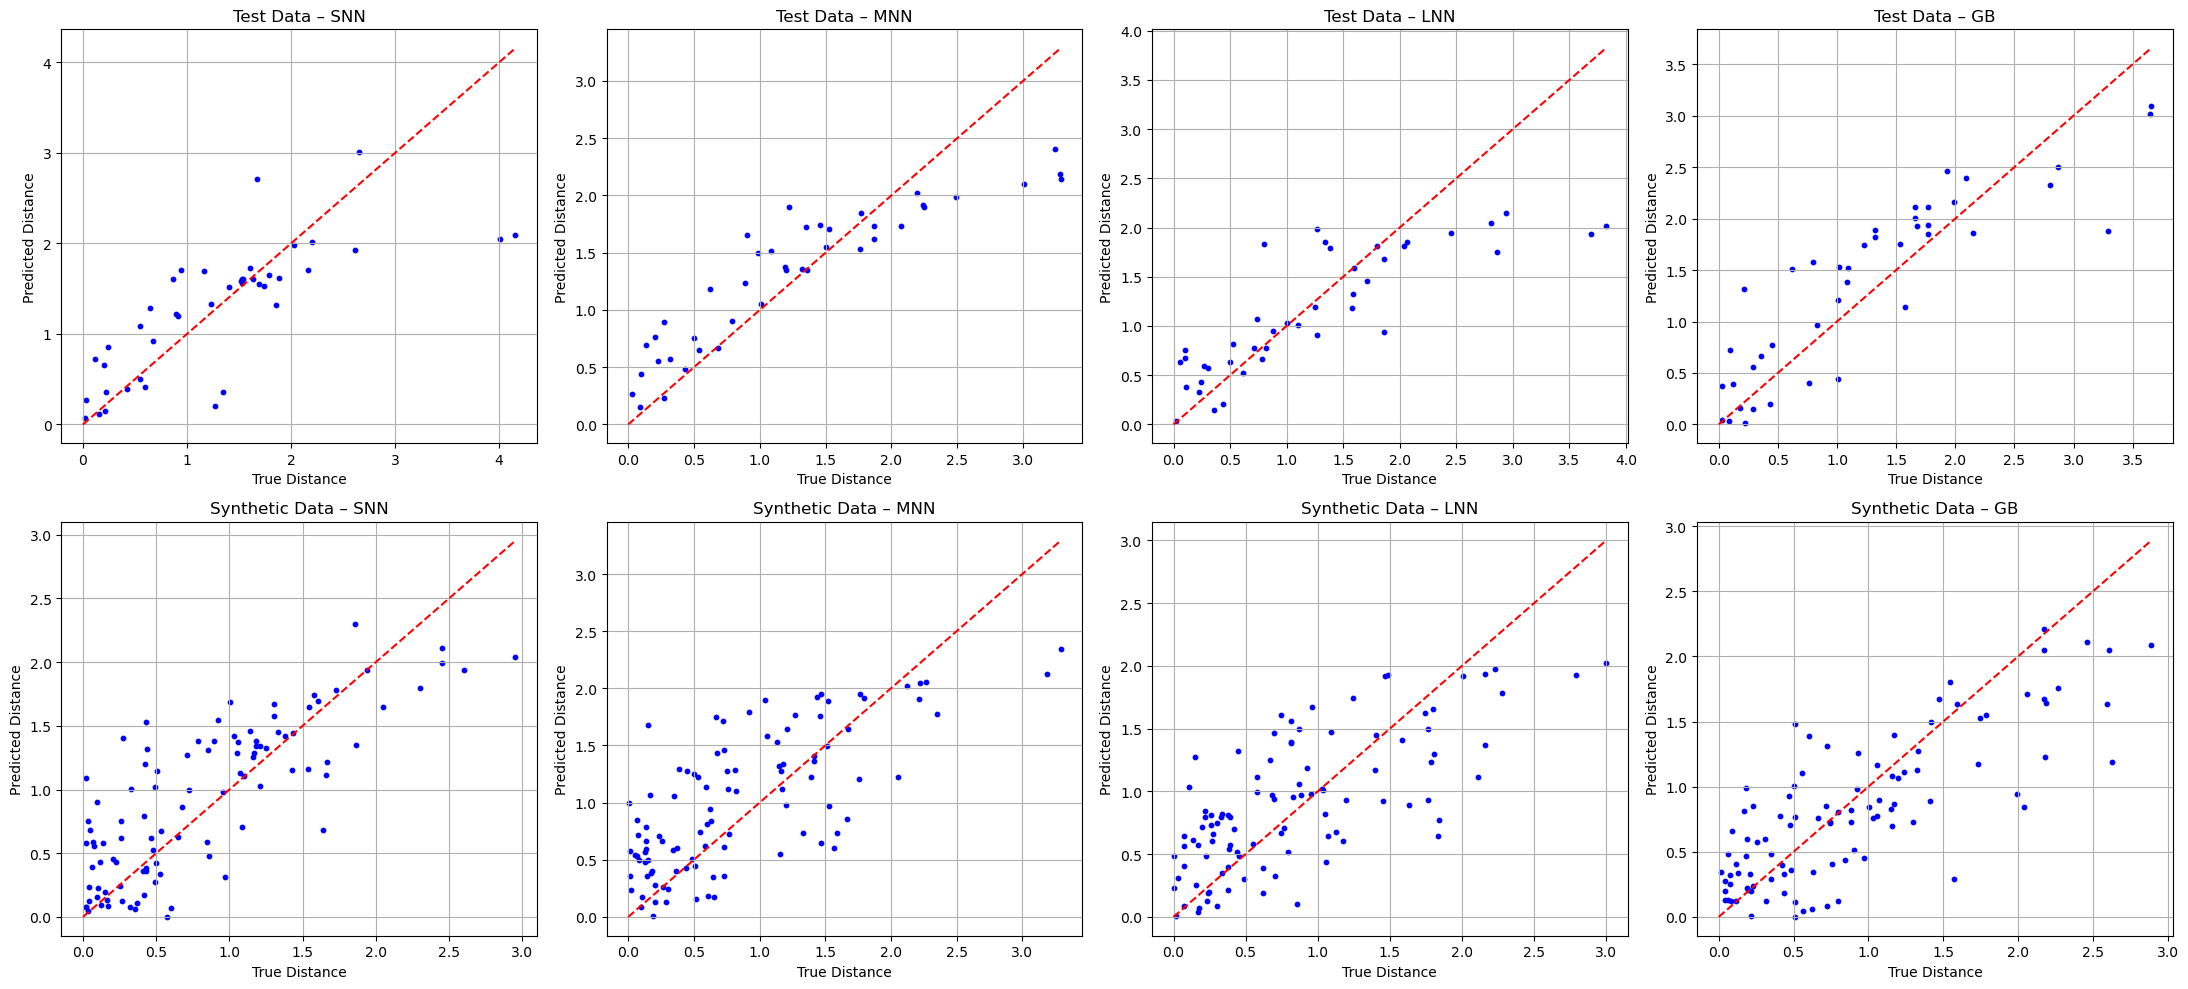


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.528866 0.090781   0.836722  0.187113
     Test Data   MNN  0.460751 0.081746   0.711981  0.144888
     Test Data   LNN  0.504460 0.052732   0.802007  0.134952
     Test Data    GB  0.503095 0.063492   0.660876  0.120448
Synthetic Data   SNN  0.343692 0.014247   0.429547  0.020660
Synthetic Data   MNN  0.415853 0.027703   0.524539  0.029612
Synthetic Data   LNN  0.385539 0.033473   0.486196  0.042861
Synthetic Data    GB  0.330134 0.015299   0.443180  0.009248


In [19]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

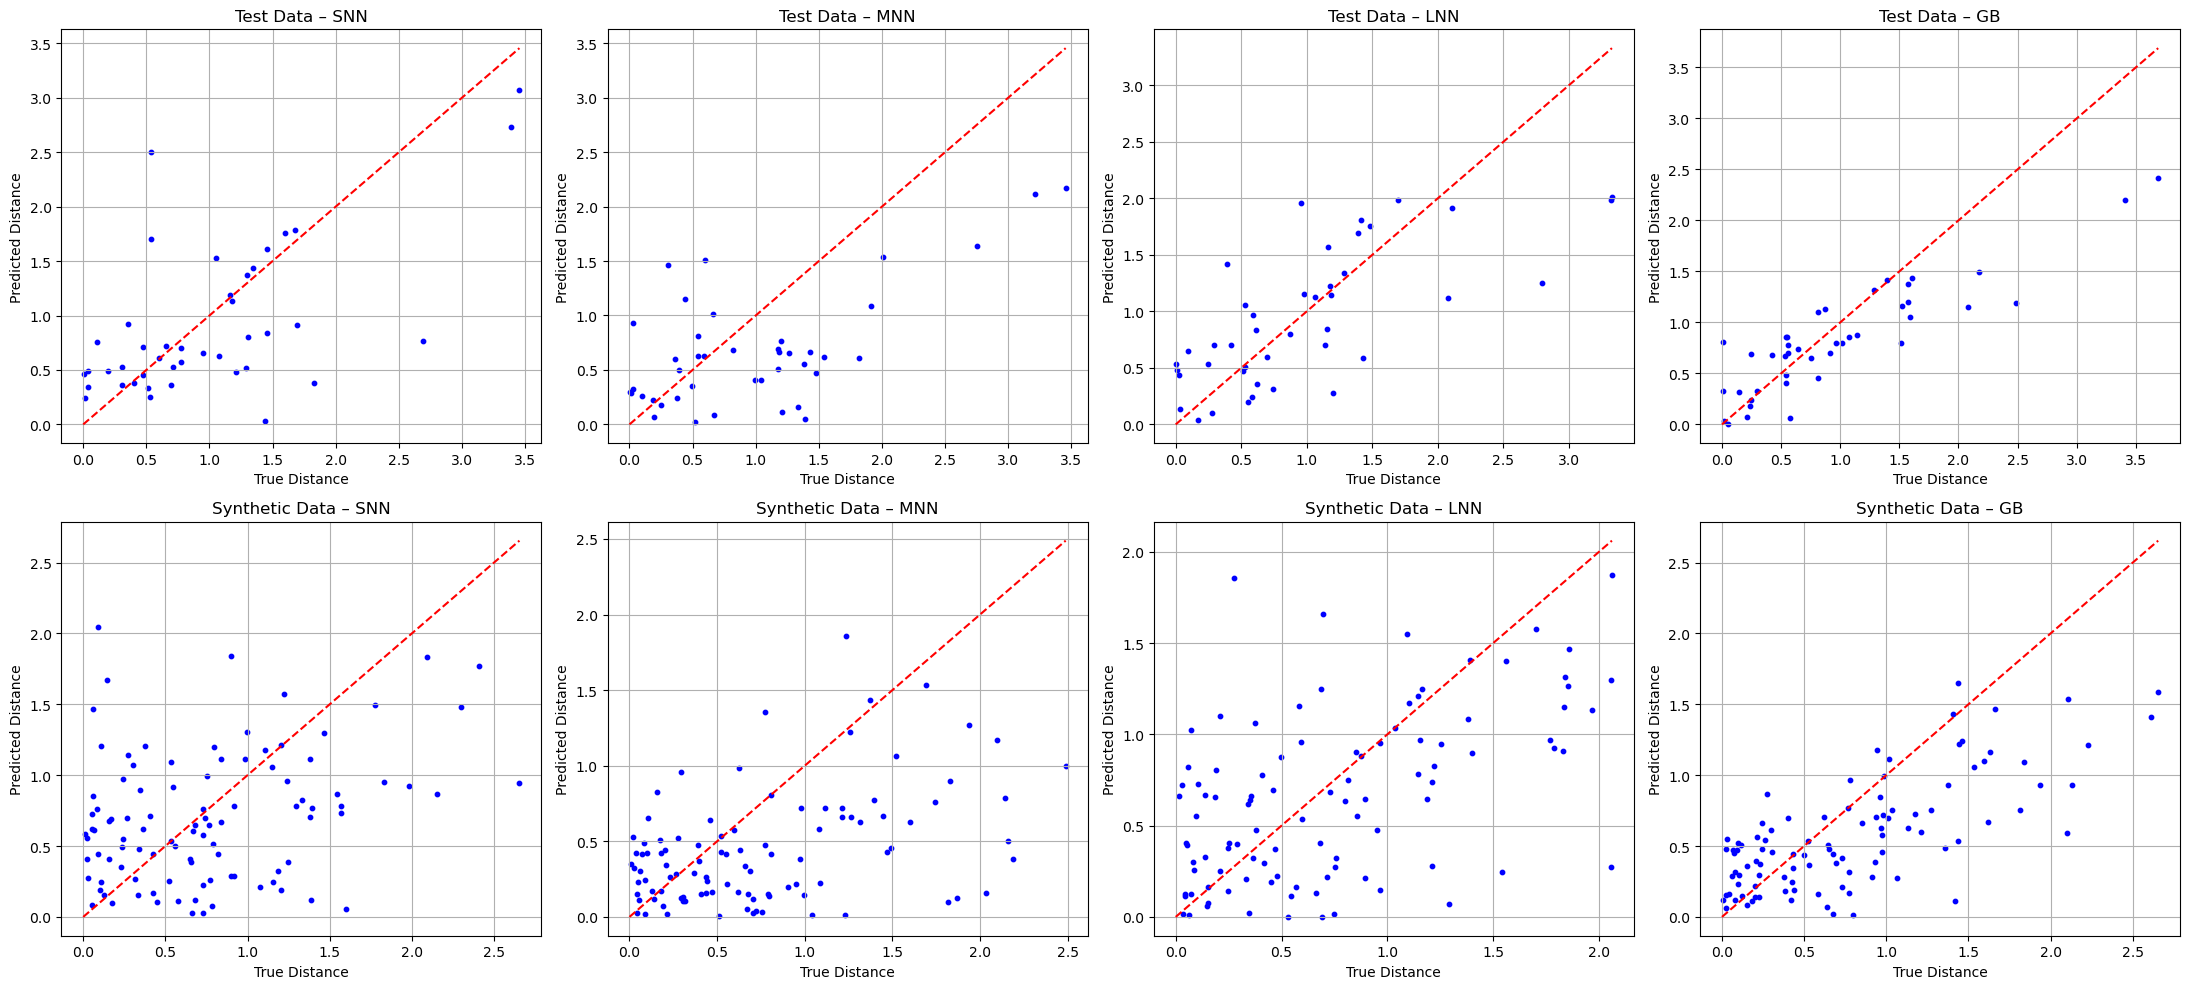


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.461492 0.089988   0.622209  0.117282
     Test Data   MNN  0.559011 0.072131   0.699657  0.075583
     Test Data   LNN  0.486075 0.070674   0.605973  0.074229
     Test Data    GB  0.394710 0.068009   0.554930  0.090625
Synthetic Data   SNN  0.510100 0.045979   0.643439  0.050126
Synthetic Data   MNN  0.473539 0.047808   0.618596  0.077453
Synthetic Data   LNN  0.429767 0.018709   0.560621  0.029154
Synthetic Data    GB  0.369901 0.040811   0.514029  0.054541


In [20]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

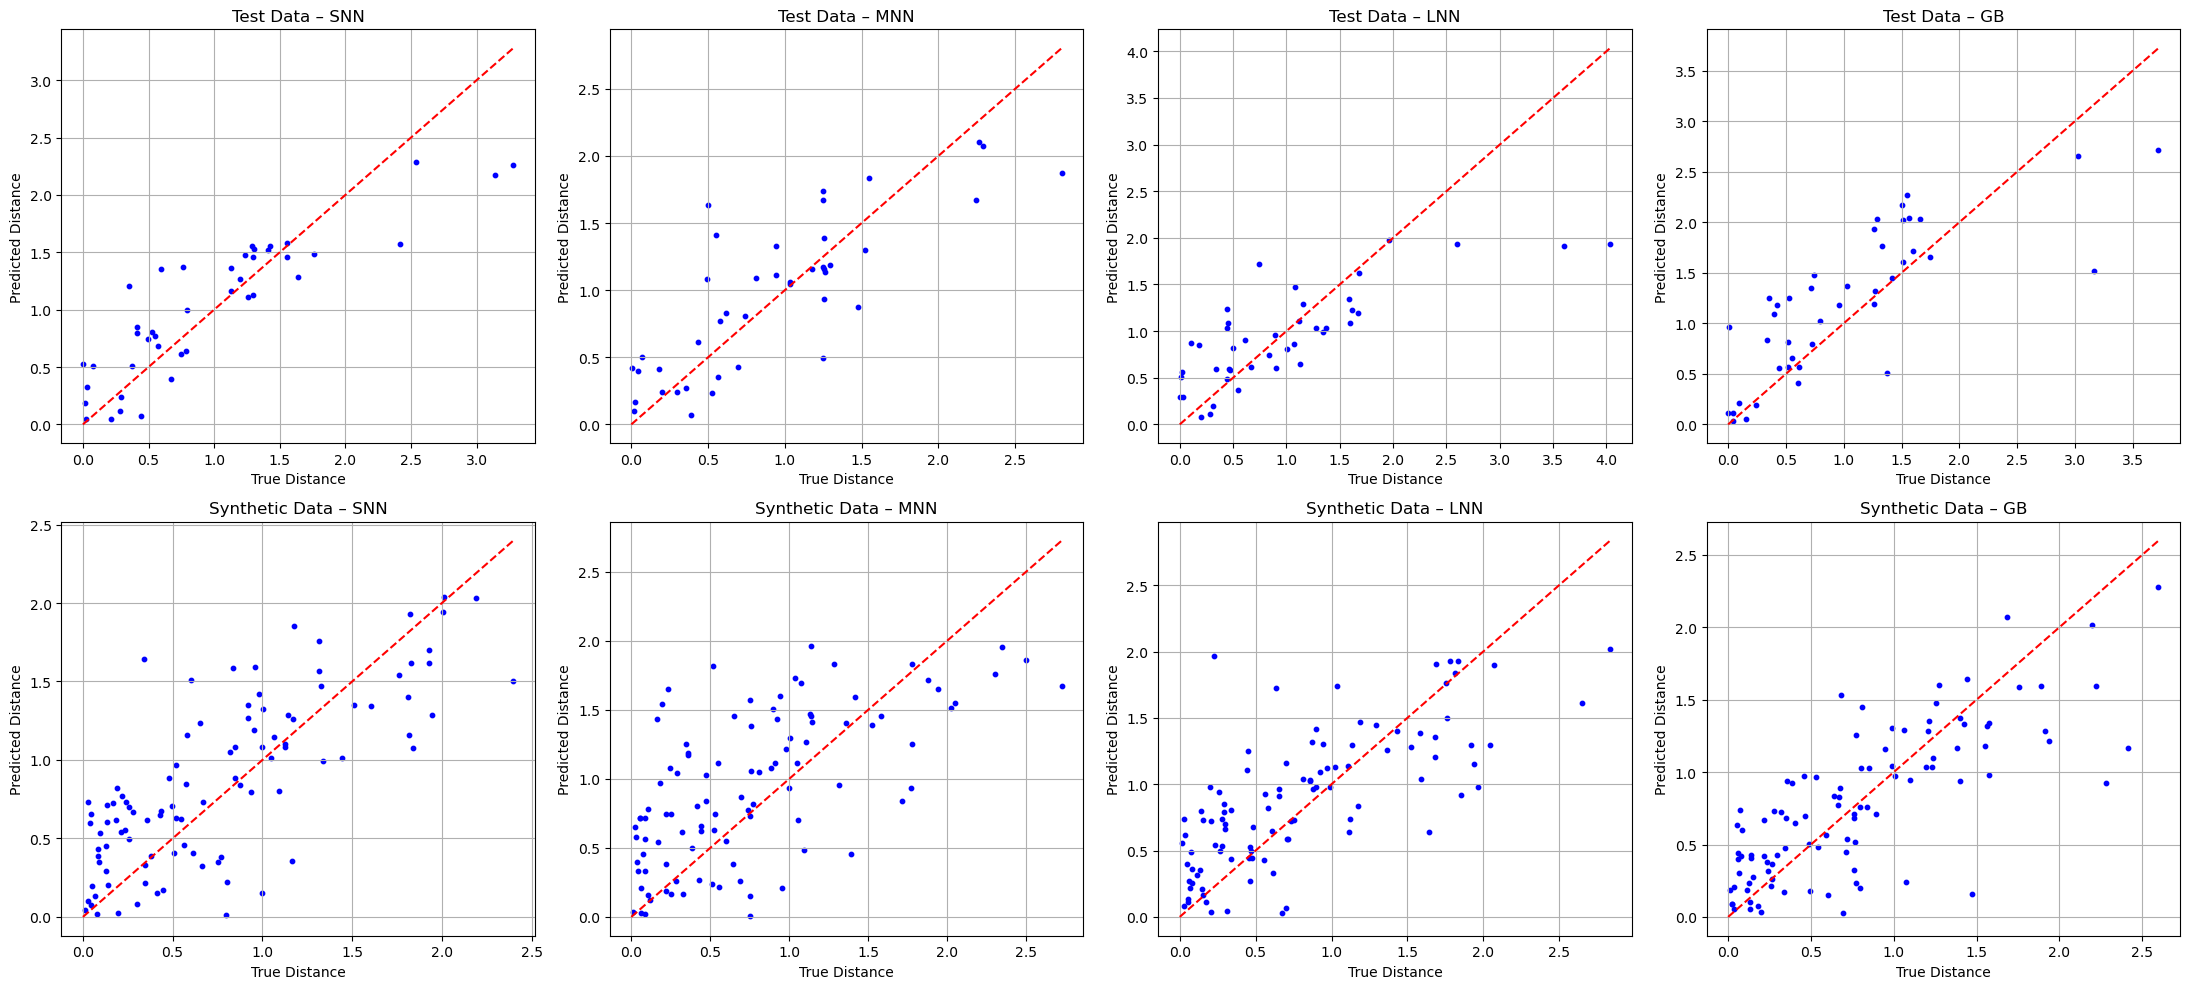


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.333157 0.054066   0.457518  0.089777
     Test Data   MNN  0.371211 0.040594   0.511228  0.071614
     Test Data   LNN  0.418380 0.066357   0.583449  0.119204
     Test Data    GB  0.442220 0.030997   0.536068  0.021703
Synthetic Data   SNN  0.325506 0.034170   0.415214  0.044626
Synthetic Data   MNN  0.371819 0.039635   0.477776  0.042869
Synthetic Data   LNN  0.347685 0.027267   0.454053  0.046710
Synthetic Data    GB  0.276337 0.015821   0.365874  0.027615


In [21]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

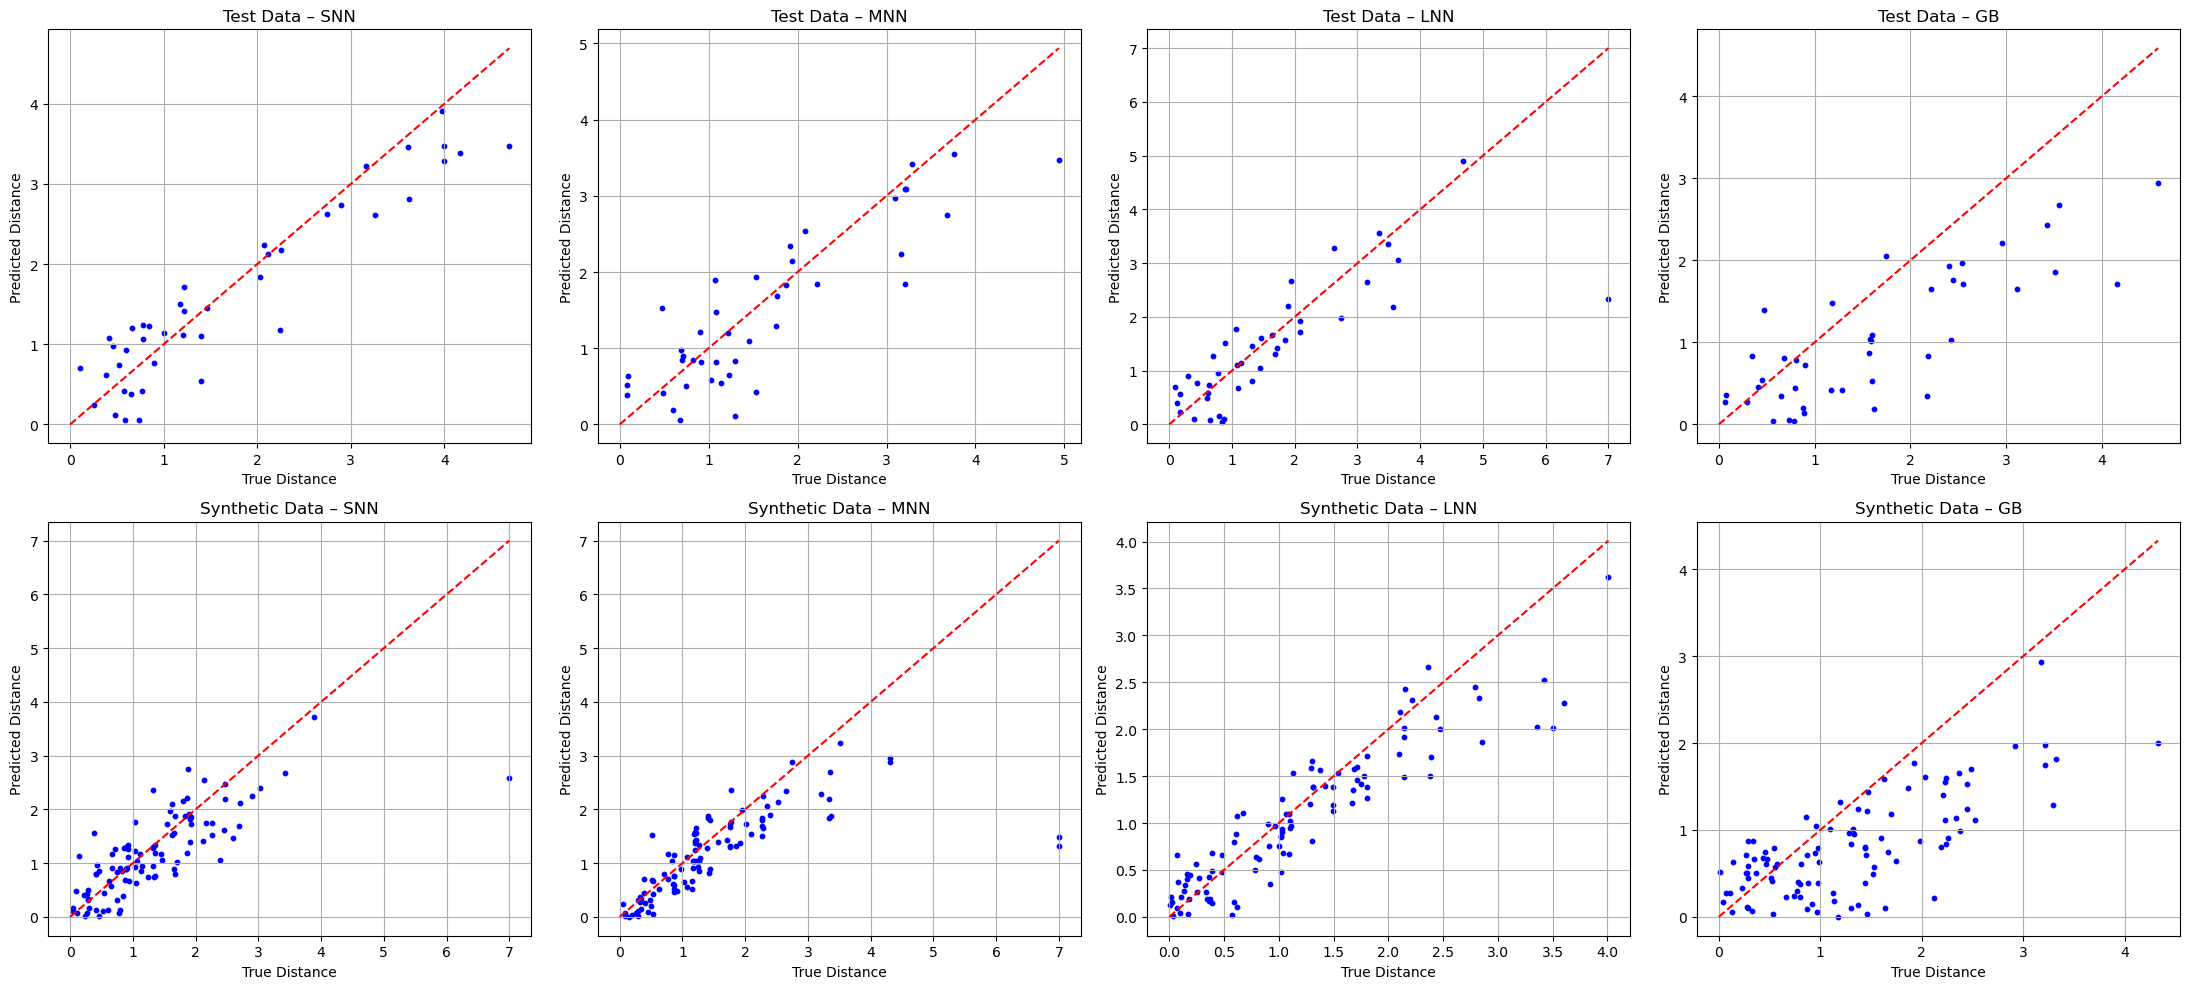


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.485926 0.057256   0.621481  0.077826
     Test Data   MNN  0.542237 0.086991   0.737514  0.169011
     Test Data   LNN  0.582726 0.078601   0.816083  0.128674
     Test Data    GB  0.942620 0.125181   1.259562  0.252077
Synthetic Data   SNN  0.369697 0.047374   0.542542  0.108456
Synthetic Data   MNN  0.360273 0.054656   0.593862  0.221388
Synthetic Data   LNN  0.367852 0.045866   0.536340  0.092320
Synthetic Data    GB  0.626355 0.041567   0.798844  0.045286


In [22]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

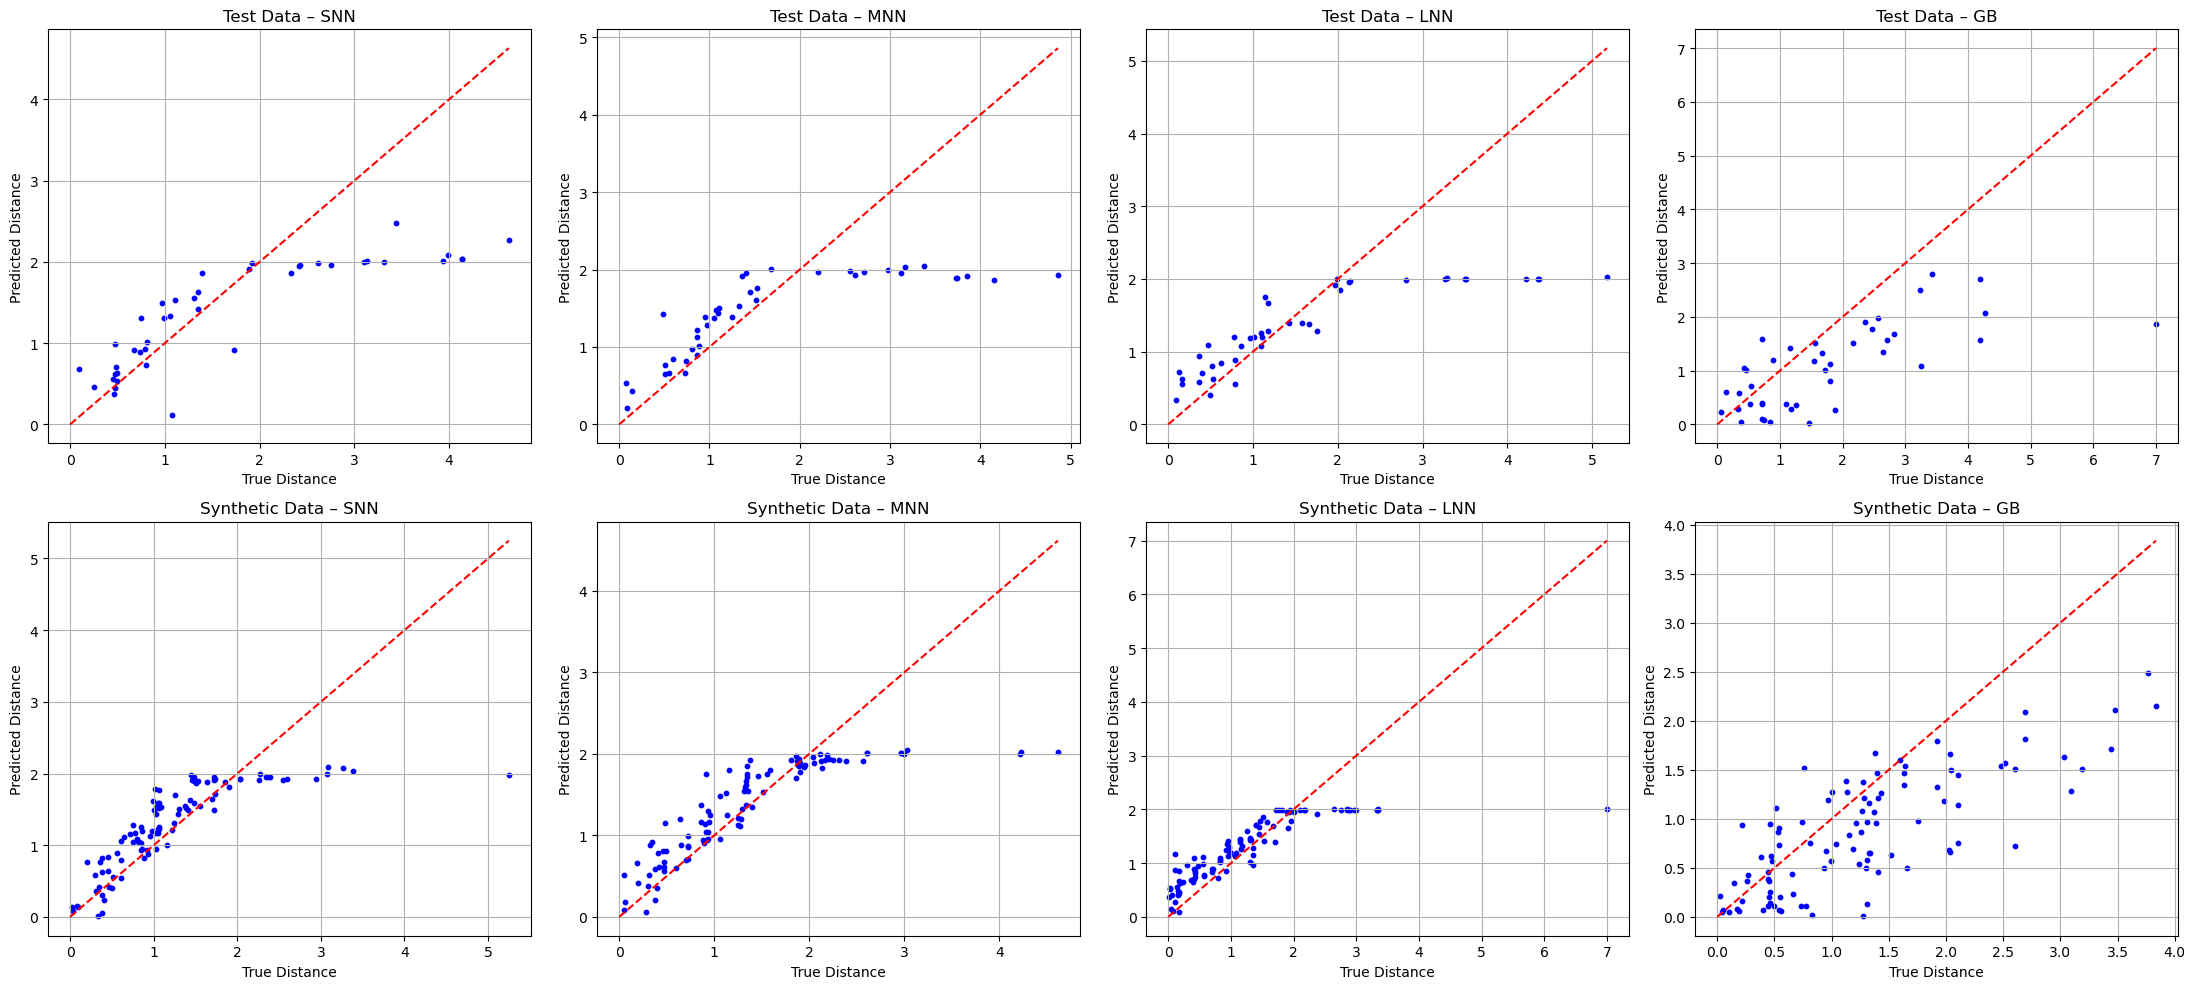


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.597354 0.065423   0.925151  0.129524
     Test Data   MNN  0.621256 0.045613   1.016004  0.091470
     Test Data   LNN  0.622056 0.069576   1.030926  0.201577
     Test Data    GB  0.856270 0.068768   1.122257  0.136829
Synthetic Data   SNN  0.328269 0.024504   0.543857  0.107400
Synthetic Data   MNN  0.303237 0.017520   0.469133  0.042232
Synthetic Data   LNN  0.355936 0.060234   0.525216  0.121437
Synthetic Data    GB  0.586711 0.040534   0.744673  0.051841


In [23]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS6_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)